## Skill-Based Clustering of Football Players Using the FIFA 20 Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Basic Checks 

In [2]:
df = pd.read_csv(r"C:\Users\balag\OneDrive\Desktop\Data Mites\Projects\PRCP-1004-Fifa20\Data\players_20.csv")
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  ...   lwb   ldm   cdm   rdm   rwb    lb  \
0                       FC Barcelona  ...  68+2  66+2  66+2  66+2  68+2  63+2   
1                           Juventus  ...  65+3  61+3  61+3  61+3  65+3  61+3   
2                Paris Saint-Germain  ...  66+3  61+3  61+3  61+3  66+3  61+3   
3                    Atlético Madrid  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4                        Real Madrid  ...  66+3  63+3  63+3  63+3  66+3  61+3   
...                              ...  ...   ...   ...   ...   ...   ...   ...   
18273               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2  43+2  45+2   
18274               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2  44+2  46+2   
18275         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2  47+2  47+2   
18276  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2  48+2  48+2   
18277         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2  48+2  48+2   

        lcb    cb   rcb    rb  
0      52+2  52+2  52+2  63+2  
1      53+3  53+3  53+3  61+3  
2      46+3  46+3  46+3  61+3  
3       NaN   NaN   NaN   NaN  
4      49+3  49+3  49+3  61+3  
...     ...   ...   ...   ...  
18273  46+2  46+2  46+2  45+2  
18274  47+2  47+2  47+2  46+2  
18275  49+2  49+2  49+2  47+2  
18276  49+2  49+2  49+2  48+2  
18277  50+2  50+2  50+2  48+2  

[18278 rows x 104 columns]

In [3]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [4]:
df.tail()

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  ...   lwb   ldm   cdm   rdm  \
18273    China PR               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2   
18274    China PR               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2   
18275    China PR         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2   
18276    China PR  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2   
18277    China PR         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2   

        rwb    lb   lcb    cb   rcb    rb  
18273  43+2  45+2  46+2  46+2  46+2  45+2  
18274  44+2  46+2  47+2  47+2  47+2  46+2  
18275  47+2  47+2  49+2  49+2  49+2  47+2  
18276  48+2  48+2  49+2  49+2  49+2  48+2  
18277  48+2  48+2  50+2  50+2  50+2  48+2  

[5 rows x 104 columns]

In [5]:
df.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot  ...  mentality_penalties  mentality_composure  \
count  18278.000000  ...         18278.000000         18278.000000   
mean       2.944250  ...            48.383357            58.528778   
std        0.664656  ...            15.708099            11.880840   
min        1.000000  ...             7.000000            12.000000   
25%        3.000000  ...            39.000000            51.000000   
50%        3.000000  ...            49.000000            60.000000   
75%        3.000000  ...            60.000000            67.000000   
max        5.000000  ...            92.000000            96.000000   

       defending_marking  defending_standing_tackle  defending_sliding_tackle  \
count       18278.000000               18278.000000              18278.000000   
mean           46.848889                  47.640333                 45.606631   
std            20.091287                  21.585641                 21.217734   
min             1.000000                   5.000000                  3.000000   
25%            29.000000                  27.000000                 24.000000   
50%            52.000000                  55.000000                 52.000000   
75%            64.000000                  66.000000                 64.000000   
max            94.000000                  92.000000                 90.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        18278.000000          18278.000000         18278.000000   
mean            16.572765             16.354853            16.212934   
std             17.738069             16.996925            16.613665   
min              1.000000              1.000000             1.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             90.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  
count             18278.000000          18278.000000  
mean                 16.368038             16.709924  
std                  17.136497             18.038125  
min                   1.000000              1.000000  
25%                   8.000000              8.000000  
50%                  11.000000             11.000000  
75%                  14.000000             14.000000  
max                  91.000000             92.000000  

[8 rows x 61 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [7]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [8]:
df.shape

(18278, 104)

In [9]:
df.describe(include='O')

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type  ...    lwb    ldm    cdm  \
count           18278          18278     18278  ...  16242  16242  16242   
unique              2              9        10  ...     98     98     98   
top             Right  Medium/Medium    Normal  ...   59+2   59+2   59+2   
freq            13960           9875     10750  ...    682    636    636   

          rdm    rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  16242  
unique     98     98     96    110    110    110     96  
top      59+2   59+2   61+2   63+2   63+2   63+2   61+2  
freq      636    682    667    621    621    621    667  

[4 rows x 43 columns]

In [10]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [11]:
columns = list(df.columns)
print(columns)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

Exploratory Data Analysis

In [12]:
df.corr(numeric_only = True)

sofifa_id       age  height_cm  weight_kg   overall  \
sofifa_id                 1.000000 -0.736680  -0.093464  -0.203620 -0.445061   
age                      -0.736680  1.000000   0.081391   0.237169  0.464305   
height_cm                -0.093464  0.081391   1.000000   0.768816  0.039945   
weight_kg                -0.203620  0.237169   0.768816   1.000000  0.156522   
overall                  -0.445061  0.464305   0.039945   0.156522  1.000000   
...                            ...       ...        ...        ...       ...   
goalkeeping_diving       -0.113073  0.110313   0.367433   0.342329 -0.013239   
goalkeeping_handling     -0.116270  0.112929   0.367163   0.343211 -0.013716   
goalkeeping_kicking      -0.114658  0.112615   0.364992   0.339805 -0.017393   
goalkeeping_positioning  -0.123064  0.121381   0.367097   0.344397 -0.006408   
goalkeeping_reflexes     -0.113487  0.111811   0.367375   0.343126 -0.012775   

                         potential  value_eur  wage_eur  \
sofifa_id                 0.042015  -0.159848 -0.228084   
age                      -0.262872   0.081513  0.151031   
height_cm                -0.002432   0.009527  0.019547   
weight_kg                -0.011738   0.051782  0.065946   
overall                   0.646650   0.638230  0.573578   
...                            ...        ...       ...   
goalkeeping_diving       -0.049662  -0.022094 -0.023629   
goalkeeping_handling     -0.050859  -0.022119 -0.023590   
goalkeeping_kicking      -0.056216  -0.023048 -0.024679   
goalkeeping_positioning  -0.049007  -0.020554 -0.022428   
goalkeeping_reflexes     -0.050985  -0.021607 -0.024253   

                         international_reputation  weak_foot  ...  \
sofifa_id                               -0.360765  -0.092250  ...   
age                                      0.259582   0.073988  ...   
height_cm                                0.037935  -0.175200  ...   
weight_kg                                0.090854  -0.128568  ...   
overall                                  0.475557   0.230276  ...   
...                                           ...        ...  ...   
goalkeeping_diving                       0.006039  -0.232714  ...   
goalkeeping_handling                     0.005962  -0.232357  ...   
goalkeeping_kicking                      0.004454  -0.228380  ...   
goalkeeping_positioning                  0.008561  -0.230529  ...   
goalkeeping_reflexes                     0.005989  -0.233494  ...   

                         mentality_penalties  mentality_composure  \
sofifa_id                          -0.147125            -0.385061   
age                                 0.141375             0.370149   
height_cm                          -0.335786            -0.159296   
weight_kg                          -0.246309            -0.054167   
overall                             0.347950             0.719992   
...                                      ...                  ...   
goalkeeping_diving                 -0.624495            -0.414361   
goalkeeping_handling               -0.623164            -0.413082   
goalkeeping_kicking                -0.619899            -0.411327   
goalkeeping_positioning            -0.621893            -0.406664   
goalkeeping_reflexes               -0.623012            -0.413013   

                         defending_marking  defending_standing_tackle  \
sofifa_id                        -0.131479                  -0.087414   
age                               0.157007                   0.116857   
height_cm                        -0.077038                  -0.068334   
weight_kg                        -0.049683                  -0.052770   
overall                           0.303075                   0.249891   
...                                    ...                        ...   
goalkeeping_diving               -0.544390                  -0.533440   
goalkeeping_handling             -0.545373                  -0.534141   
goalkeeping_kicking              -0.5429

<Axes: >

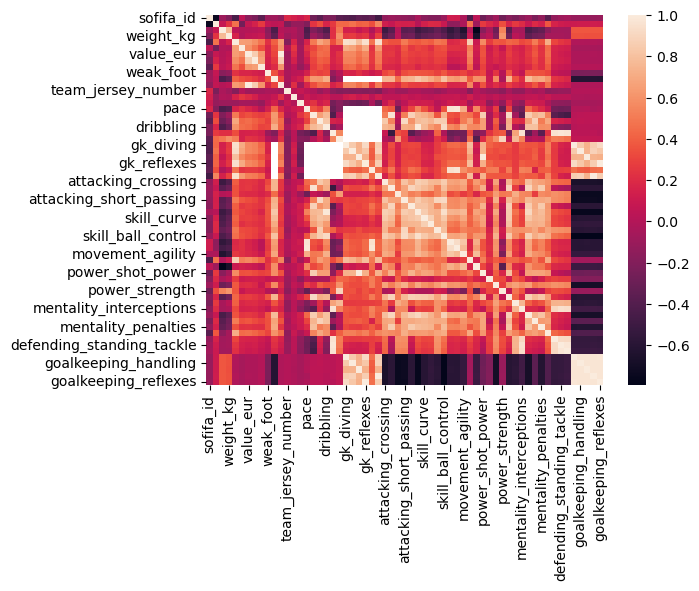

In [13]:
sns.heatmap(df.corr(numeric_only=True))

In [14]:
## REMOVE THE SPECIAL CHARACTER AND SPLIT THE STRING
df = df.replace('[\#]','',regex=True)
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [15]:
# Split the column and remove the '+' with the values after them
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
df[columns]

for colmun in columns:
    df[colmun] = df[colmun].str.split('+',expand=True)[0] 
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...  lwb  ldm  cdm  \
0        170         72   Argentina         FC Barcelona  ...   68   66   66   
1        187         83    Portugal             Juventus  ...   65   61   61   
2        175         68      Brazil  Paris Saint-Germain  ...   66   61   61   
3        188         87    Slovenia      Atlético Madrid  ...  NaN  NaN  NaN   
4        175         74     Belgium          Real Madrid  ...   66   63   63   

   rdm  rwb   lb  lcb   cb  rcb   rb  
0   66   68   63   52   52   52   63  
1   61   65   61   53   53   53   61  
2   61   66   61   46   46   46   61  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4   63   66   61   49   49   49   61  

[5 rows x 104 columns]

1.UNIVARIATE ANALYSIS

In [16]:
univariate = df[[ 'sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall',
                   'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves',
                   'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from',
                   'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
                   'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing',
                   'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                   'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                   'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                   'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                   'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
                   'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
                   'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'
]]


In [17]:
num_cols = univariate.select_dtypes(include='number').columns
cat_cols = univariate.select_dtypes(include='object').columns

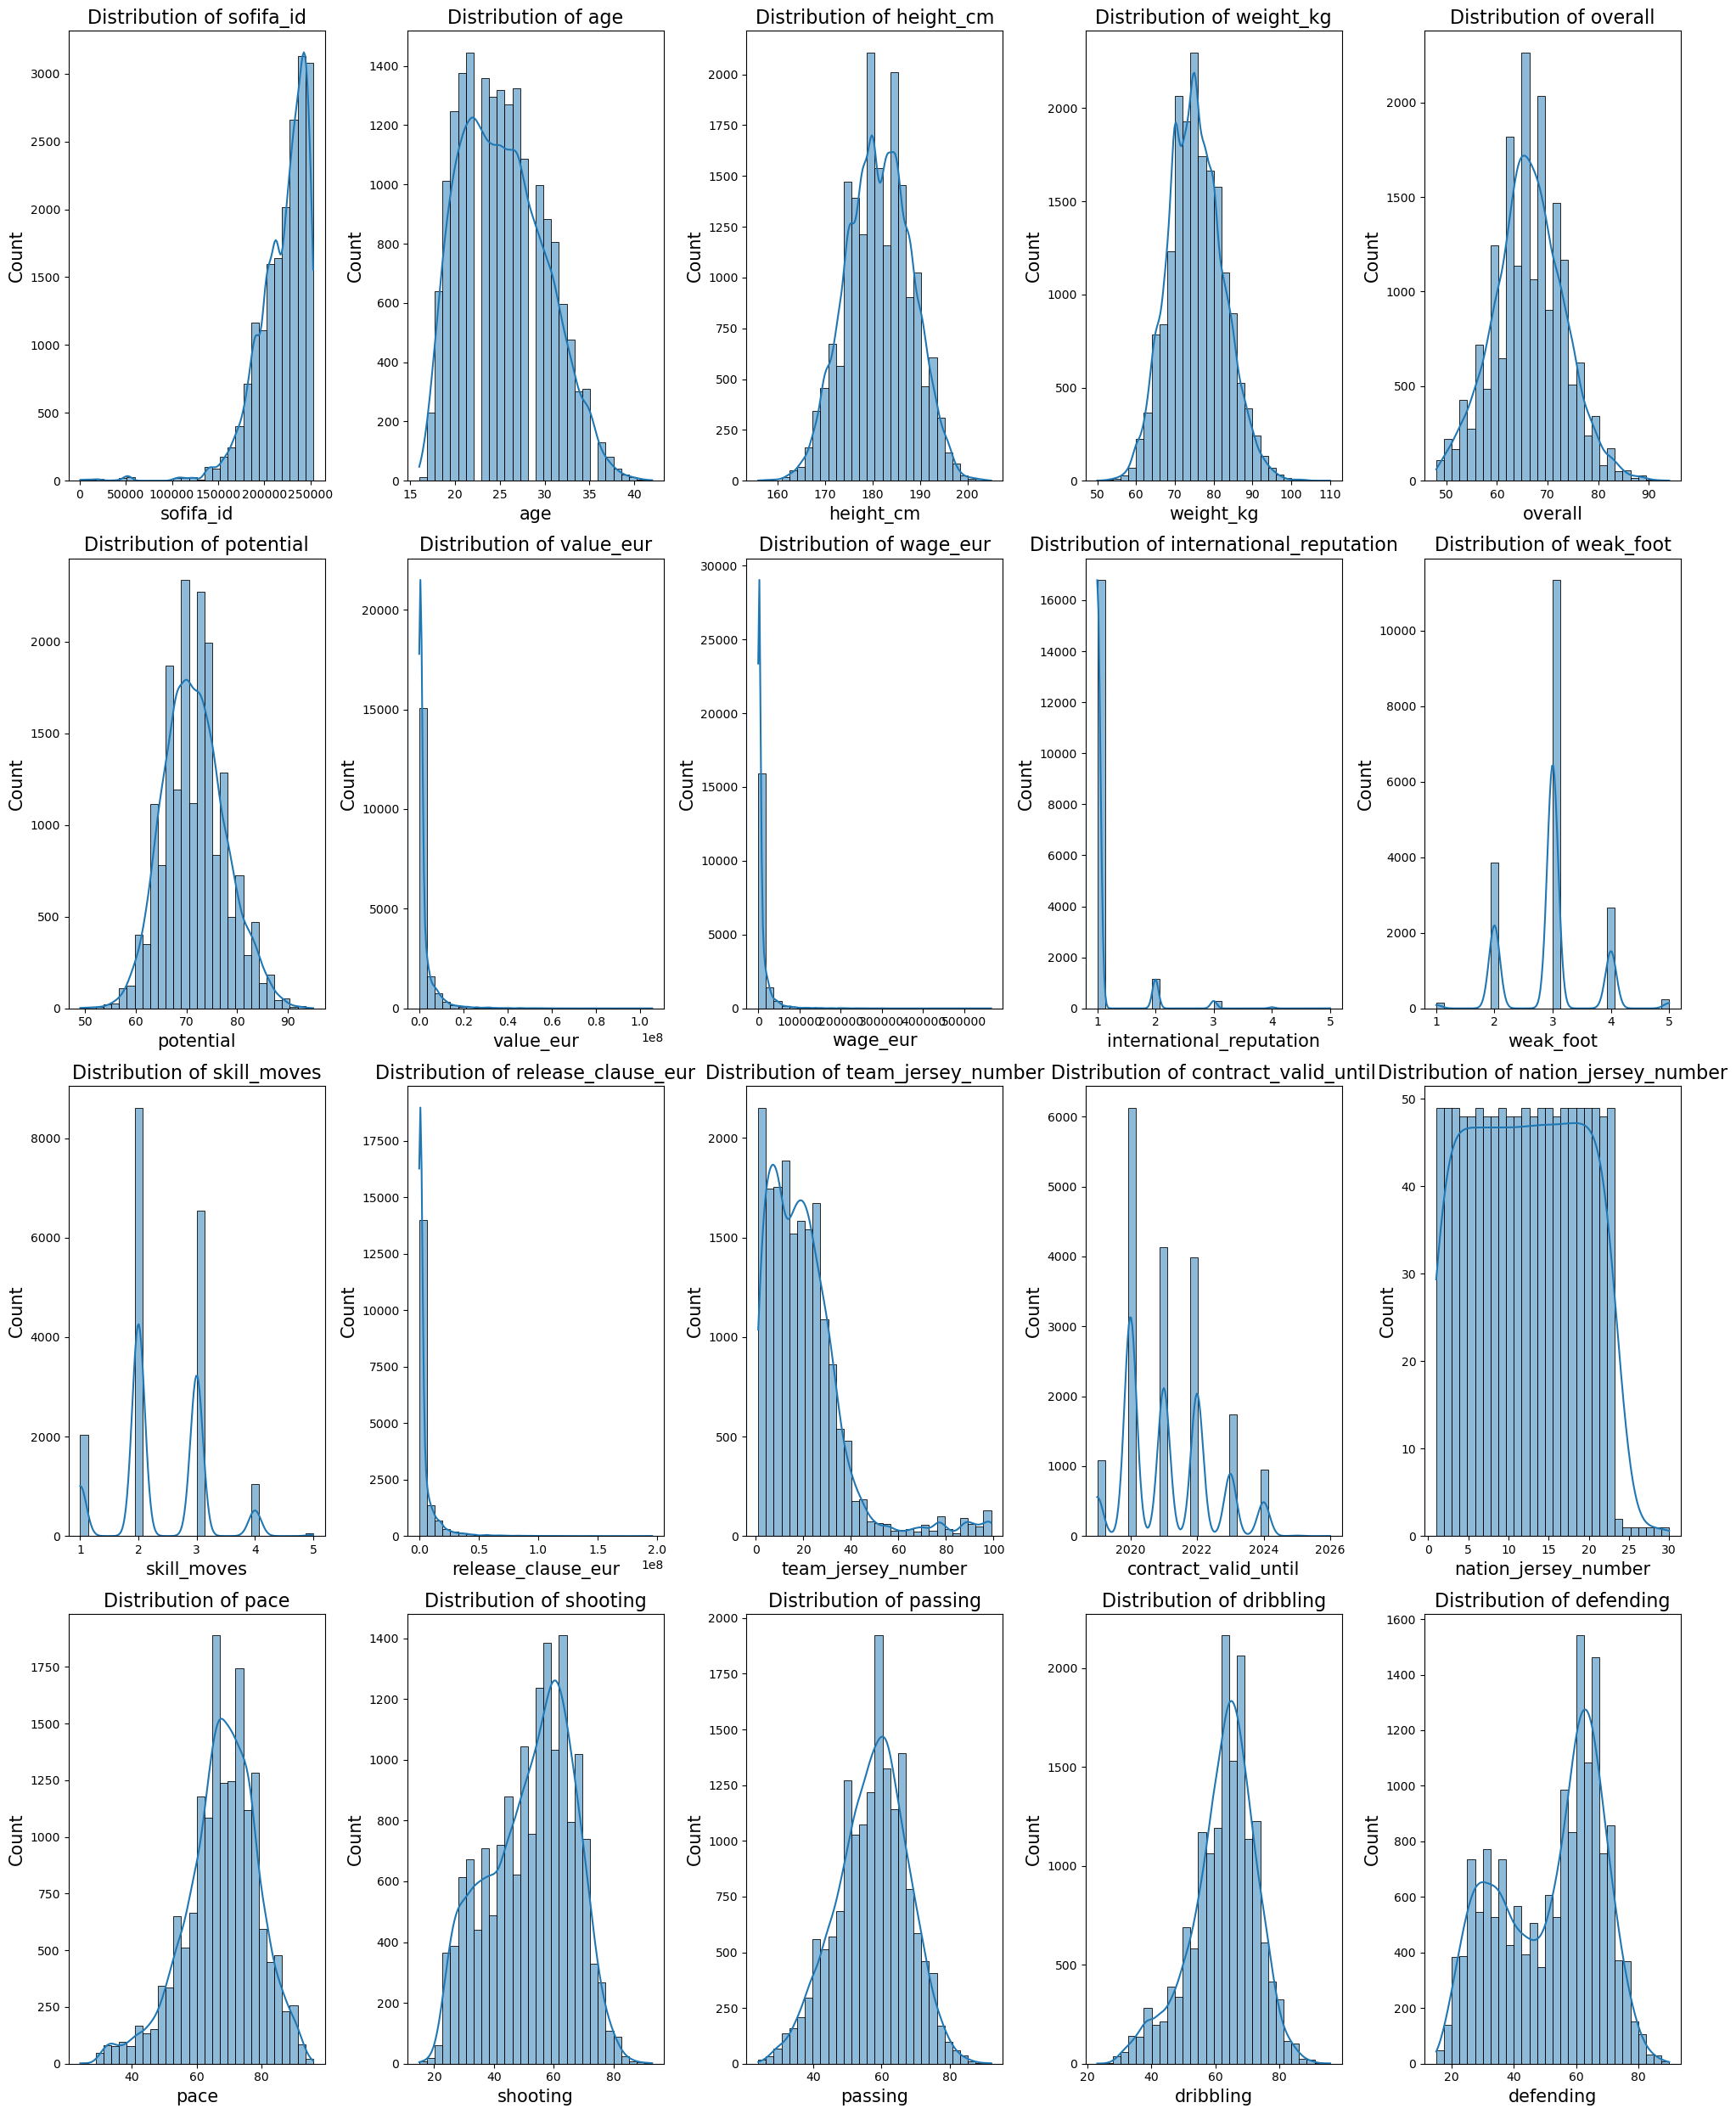

In [18]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in num_cols:
    if plotnumber <= 20:   
        ax = plt.subplot(4, 5, plotnumber)
        sns.histplot(univariate[col], bins=30, kde=True)
        plt.xlabel(col, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Distribution of {col}', fontsize=16)
        plotnumber += 1

plt.tight_layout()
plt.show()

BIVARIATE AND MULTIVARIATE ANALYSIS

NUMERICAL VARIABLE

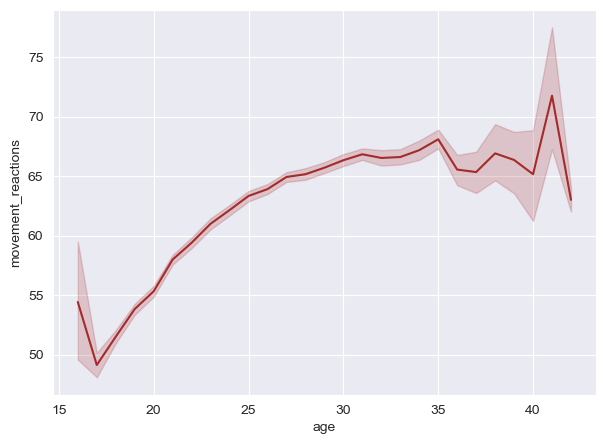

In [19]:
# IMPACT OF AGE TO MOVEMENT REACTION
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.lineplot(x='age',y='movement_reactions',data=df,color='brown')
plt.show()

At the age 15 to 20 movement raction is less.
If player age is increasing player movement reaction also increasing.

Distribution of overall rating vs age

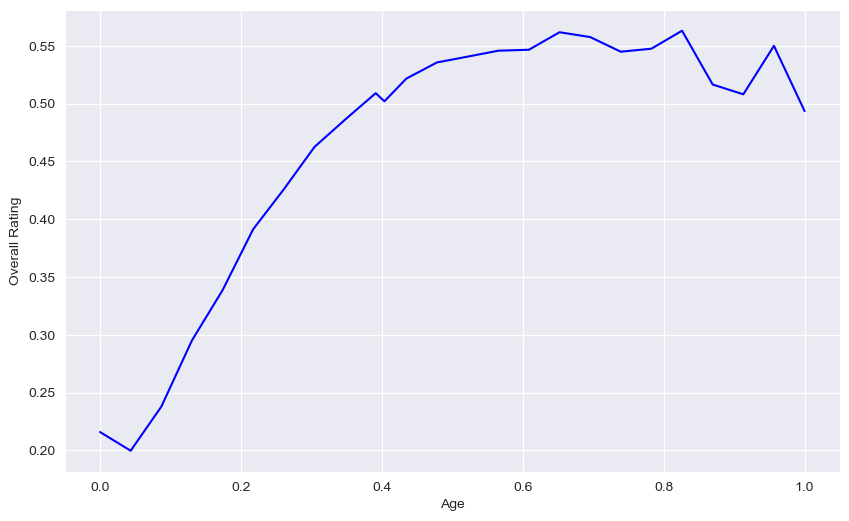

In [147]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='overall', data=df, color='blue', ci=None)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

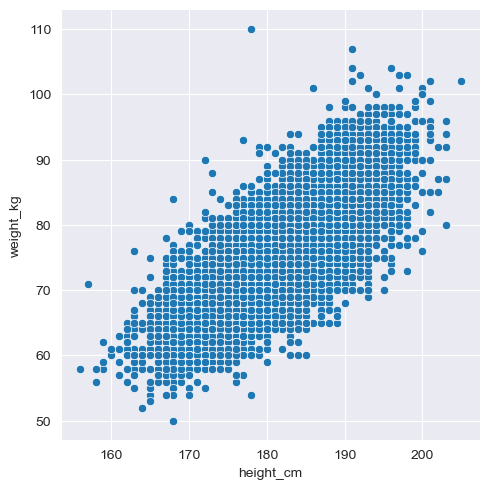

In [21]:
# IMPACT OF HEIGHT TO WEIGHT
sns.relplot(x='height_cm',y='weight_kg',data=df)
plt.show()

If the players height is increases player weight also increases.

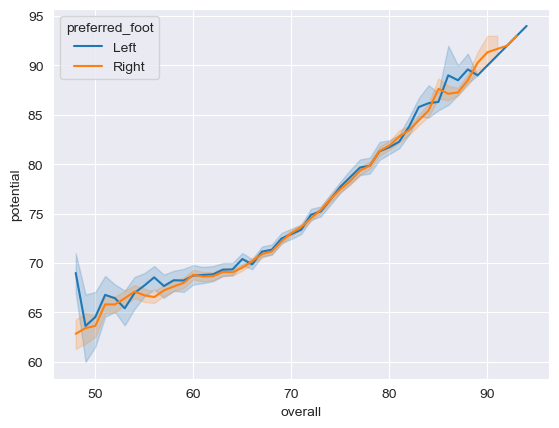

In [22]:
# RELATION BETWEEN OVERALL AND POTENTIAL WITH RESPECT TO PREFERRED FOOT
sns.lineplot(x='overall',y='potential',data=df,hue='preferred_foot')
plt.show()

If the players overall score is increasing the score of potential also increasing with both foot.

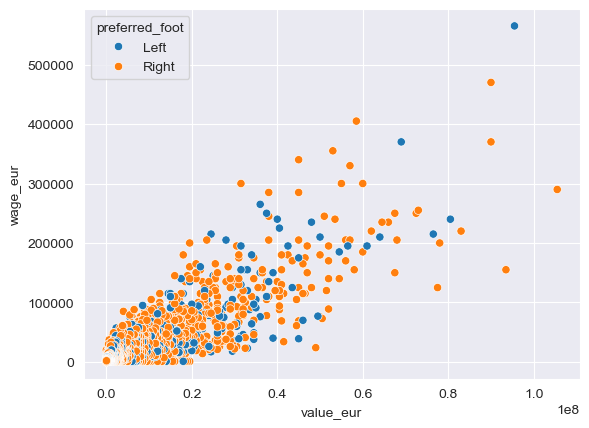

In [23]:
# RELATION BETWEEN VALUE EUR AND WAGE EURO WITH RESPECT TO PREFERRED FOOT
sns.scatterplot(x='value_eur',y='wage_eur',data=df,hue='preferred_foot')
plt.show()

If player value is less then the wage of player also less.
If the value of player is more the wage is silghtly more.

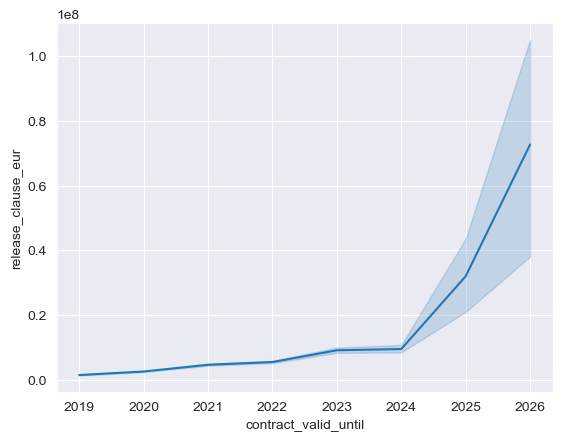

In [24]:
# IMPACT OF CONTRACT VALID UNTIL TO RELEASE CLAUSE EUR
sns.lineplot(x='contract_valid_until',y='release_clause_eur',data=df)
plt.show()

If player contract valid until 2024 to 2026 then the relase clause of player is more.
If player contract valid until 2019 to 2024 then the release clause of player is less.

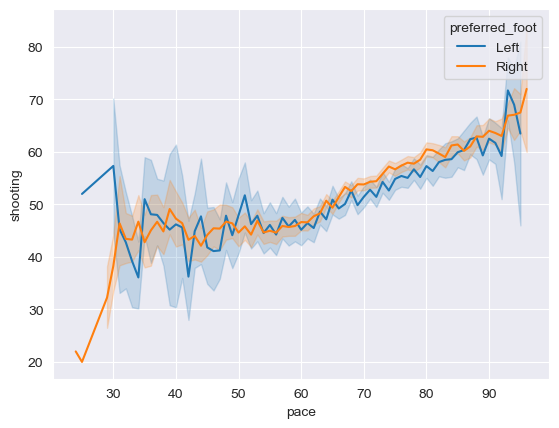

In [25]:
# RELATION BETWEEN PACE AND SHOOTING WITH RESPECT TO PREFERRED FOOT
sns.lineplot(x='pace',y='shooting',data=df,hue='preferred_foot')
plt.show()

If the player preferred left foot then the pace is less but shooting is around 50 to 60.
If the player preferred right foot then the pace is less as well as shooting also less.

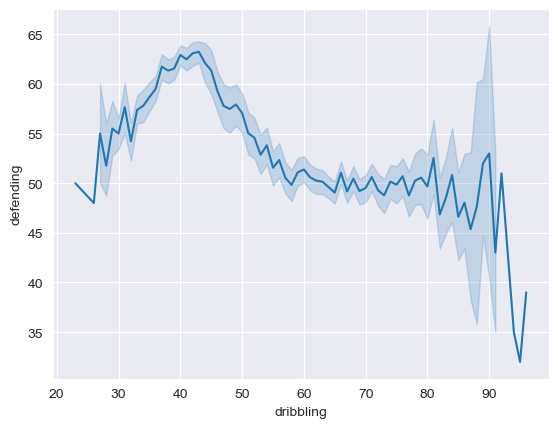

In [26]:
# IMPCAT OF DRIBBLING TO DEFENDING
sns.lineplot(x='dribbling',y='defending',data=df)
plt.show()

If the dribbling score is 30 to 50 then the defending score is high.
If dribbling score is more then the defending score also less.

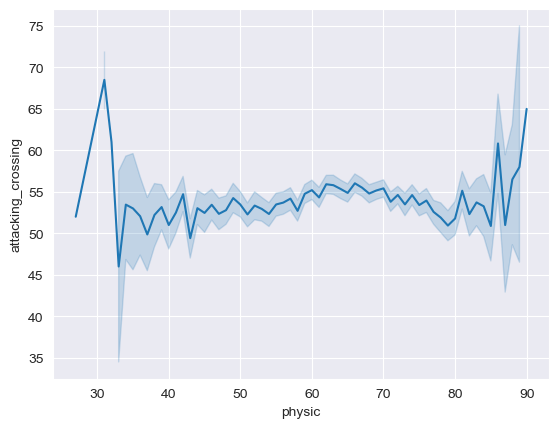

In [27]:
# IMPACT OF PHYSIC TO ATTACKING CROSSING
sns.lineplot(x='physic',y='attacking_crossing',data=df)
plt.show()

If the physic is less then the attacking crossing is more.
Otherwise physic range between 35 to 80 the attacking crossing is constant.

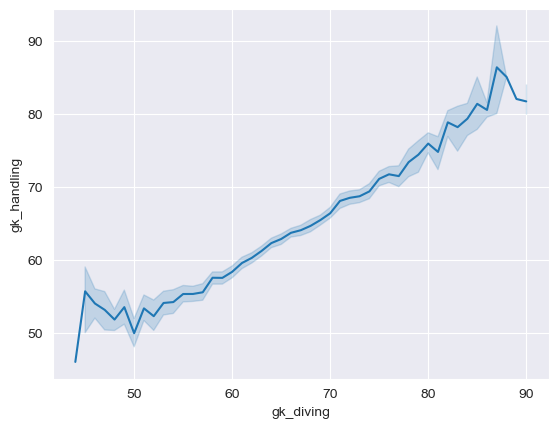

In [28]:
# IMPACT OF GK DIVING TO GK HANDLING
sns.lineplot(x='gk_diving',y='gk_handling',data=df)
plt.show()

If the gk diving score is increases the gk handling score also increases.

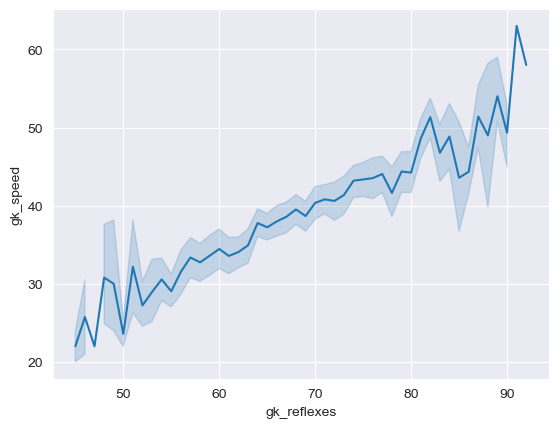

In [29]:
# IMPACT OF GK RELEXES TO GK SPPED
sns.lineplot(x='gk_reflexes',y='gk_speed',data=df)
plt.show()

Less gk reflexes then the gk speed also less.
More gk reflexes then the gk speed also more.

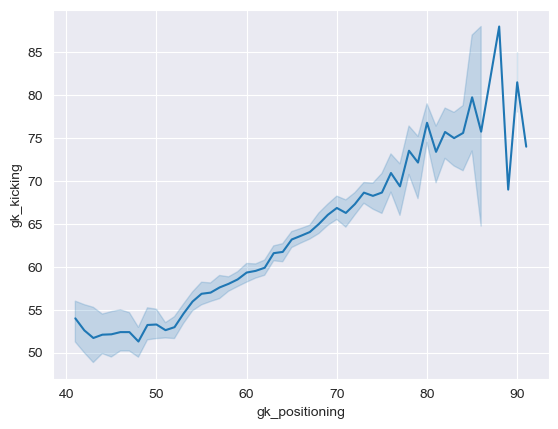

In [30]:
# IMPACT OF GK POSITIONING TO GK KICKING
sns.lineplot(x='gk_positioning',y='gk_kicking',data=df)
plt.show()

If the gk positioning score is less then the gk kicking score also less.
If the gk positioning score is increases then the gk kicking score also increases.

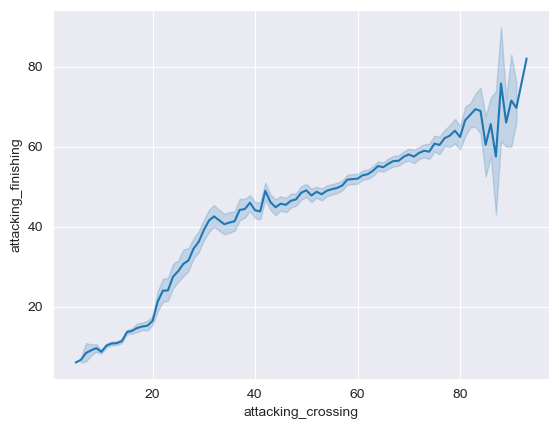

In [31]:
# IMPACT OF ATTACKING CROSSING TO ATTACKING FINISHING
sns.lineplot(x='attacking_crossing',y='attacking_finishing',data=df)
plt.show()

Attcking score between 20 to 40 then attacking finishing score around 40 to 50.
Either attacking crossing is more then attacking finishing also more.

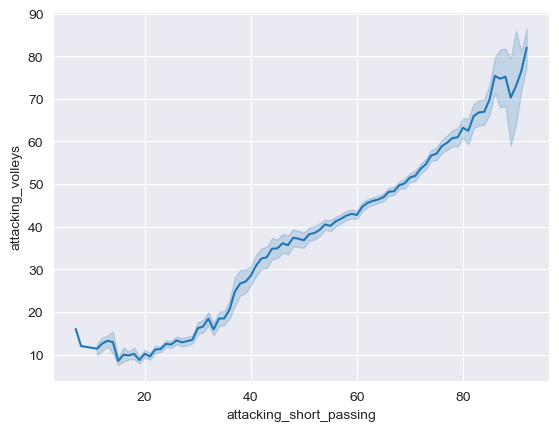

In [32]:
# IMPACT OF ATTACKING SHORT PASSING TO ATTACKING VOLLEYS
sns.lineplot(x='attacking_short_passing',y='attacking_volleys',data=df)
plt.show()

More attacking short passing then the more attacking volleys.
Less attacking short passing then the less attacking volleys.

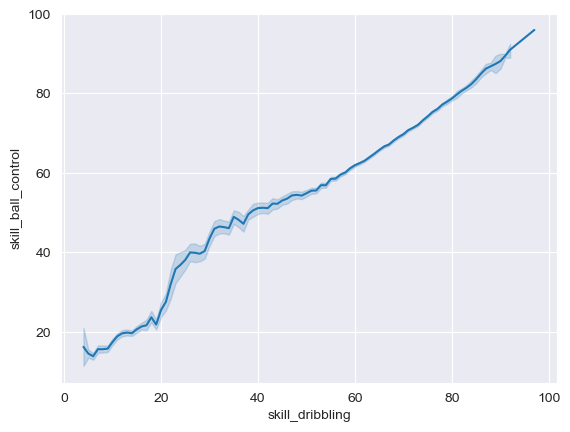

In [33]:
# IMPACT OF SKILL DRIBBLING TO SKILL BALL CONTROL
sns.lineplot(x='skill_dribbling',y='skill_ball_control',data=df)
plt.show()

If the dribbling skill is more then ball control skill also more.

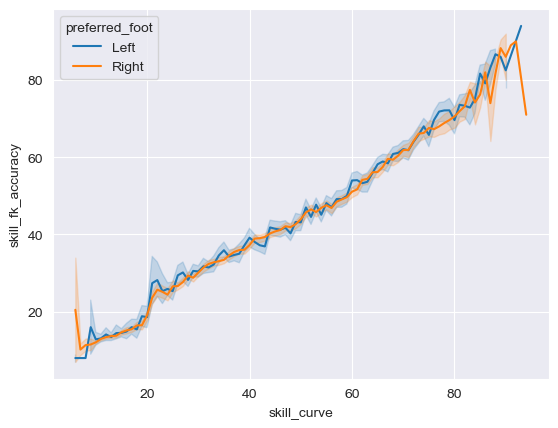

In [34]:
# RELATION BETWEEN SKILL CURVE AND SKILL FK ACCURACY WITH RESPECT TO PREFERRED FOOT
sns.lineplot(x='skill_curve',y='skill_fk_accuracy',data=df,color='brown',hue='preferred_foot')
plt.show()

If skill curve is increases then the skill fk accuracy is also increases with both foot.

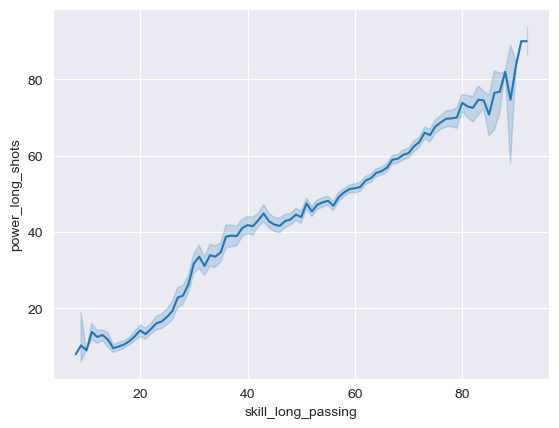

In [35]:
# IMPACT OF SKILL LONG PASSING TO POWER LONG SHOTS
sns.lineplot(x='skill_long_passing',y='power_long_shots',data=df)
plt.show()

More skills of long passing then the increase of power long shots.

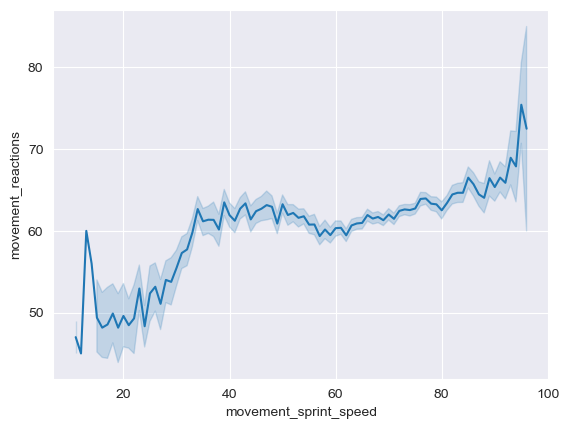

In [36]:
# IMPACT OF MOVEMENT SPRINT SPEED TO MOVEMENT REACTION
sns.lineplot(x='movement_sprint_speed',y='movement_reactions',data=df)
plt.show()

Movement sprint range around 40 to 100 then the movement reaction is constant otherwise fall in both

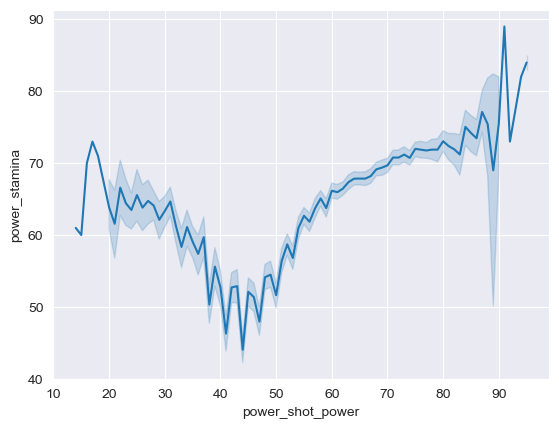

In [37]:
# IMPACT OF POWER SHOT TO POWER STAMINA
sns.lineplot(x='power_shot_power',y='power_stamina',data=df)
plt.show()

If the power shot range around 30 to 60 then the power stamina is decreases
If the player has more shot power then the stamina is more.

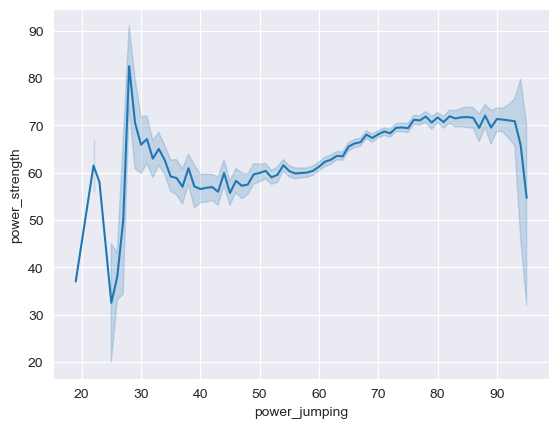

In [38]:
# IMPACT OF POWER JUMPING TO POWER STRENGTH
sns.lineplot(x='power_jumping',y='power_strength',data=df)
plt.show()

If the power jumping is 30 then the power strength is more and below 30 power jumping less power strength.
Power jumping above 30 then the power strength is constant

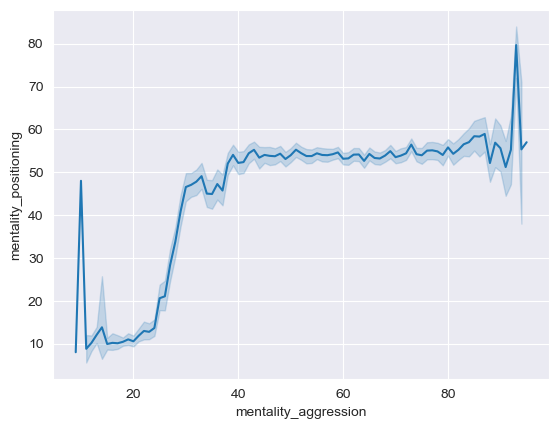

In [39]:
# IMPACT TO MENTALITY AGGRESSION TO MENTALITY POSITIONING
sns.lineplot(x='mentality_aggression',y='mentality_positioning',data=df)
plt.show()

If the mentality aggression around 10 to 30 then the mentality positioning is low
Below 10 mentality aggression the score of mentality positioning is slightly high. otherwise both metality positioning score is constant.

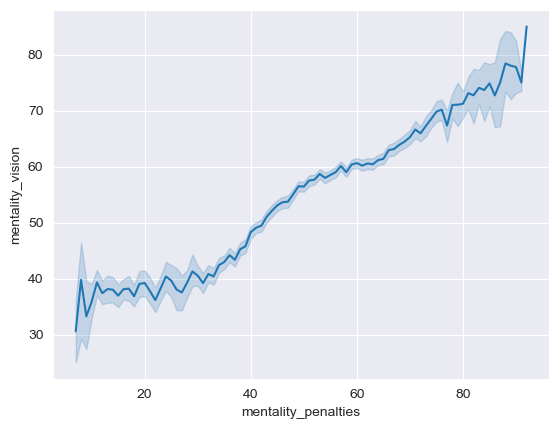

In [40]:
# IMPACT OF MENTALITY PENALTIES TO MENTALITY VISION
sns.lineplot(x='mentality_penalties',y='mentality_vision',data=df)
plt.show()

If the penalties is increases then the mentality vision also increases.

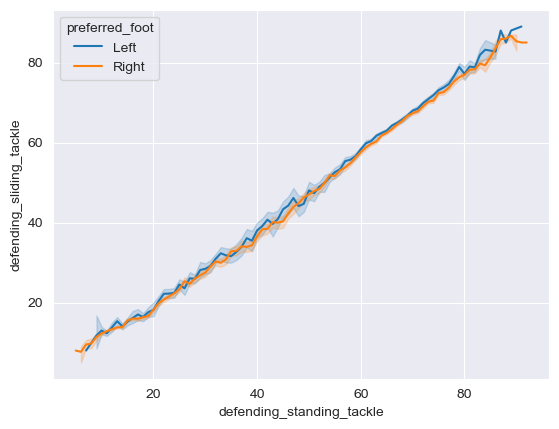

In [41]:
# .RELATION BETWEEN DEFENDING STANDING TACKLE & DEFENDING SLIDING TACKLE WITH RESPECT TO PREFERRED FOOT
sns.lineplot(x='defending_standing_tackle',y='defending_sliding_tackle',data=df,color='brown',hue='preferred_foot')
plt.show()

If defending standing tackle is increases then the defending sliding tackle also increases with both foot.

CATEGORICAL VARIABLE

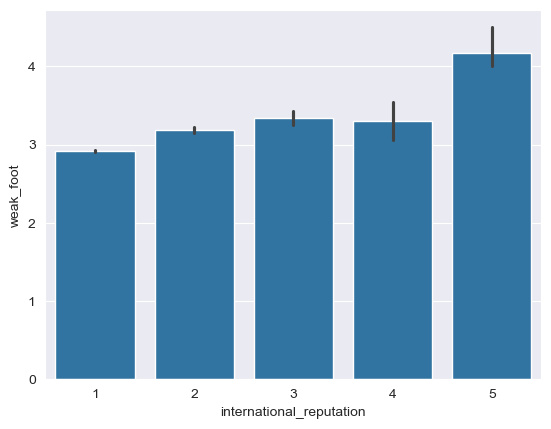

In [42]:
# IMPACT OF INTERNATIONAL REPUTATION TO WEAK FOOT
sns.barplot(x='international_reputation',y='weak_foot',data=df)
plt.show()

5 Intrenational reputation rating of player has more than 4 week foot
1 international reputation rating player has less than 3 weak foot
2, 3, 4 international reputation player has constant weak foot

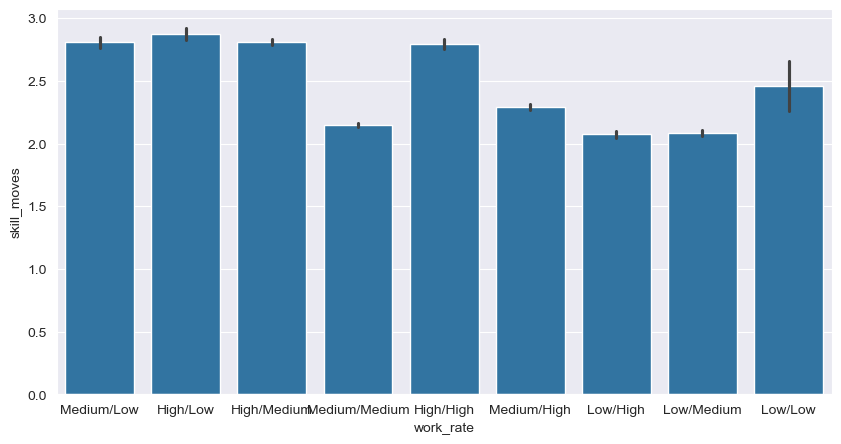

In [43]:
# IMPACT OF WORK RATE TO SKILL MOVES
plt.figure(figsize=(10,5))
sns.barplot(x='work_rate',y='skill_moves',data=df)
plt.show()

In this plot cleary seen that 4 types of work rate[medium/low, high/low, high/medium, high/high] has more than 2.5 skill moves
Other work rate skill moves is less than 2.5

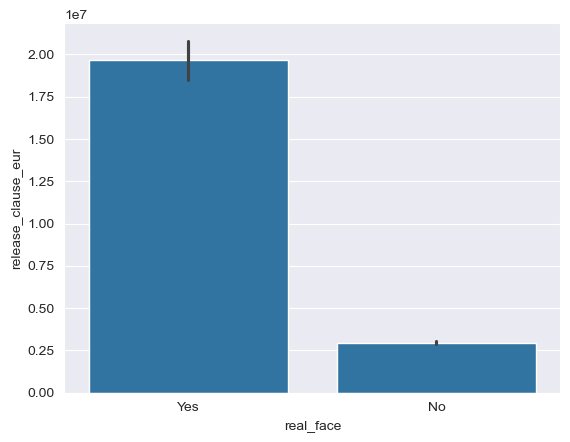

In [44]:
# IMPACT OF REAL FACE TO RELEASE CLAUSE EUR
sns.barplot(x='real_face',y='release_clause_eur',data=df)
plt.show()

If the player face is real then the release clause is more.
If the player face is not real then the release clause is less

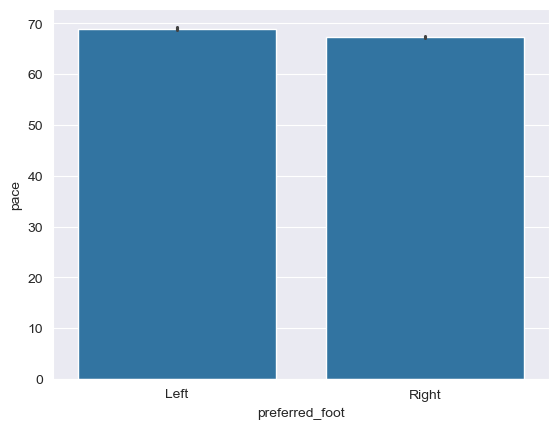

In [45]:
# IMPACT OF PREFERRED FOOT TO PACE
sns.barplot(x='preferred_foot',y='pace',data=df)
plt.show()

both left and right preferred foot player pace is same.

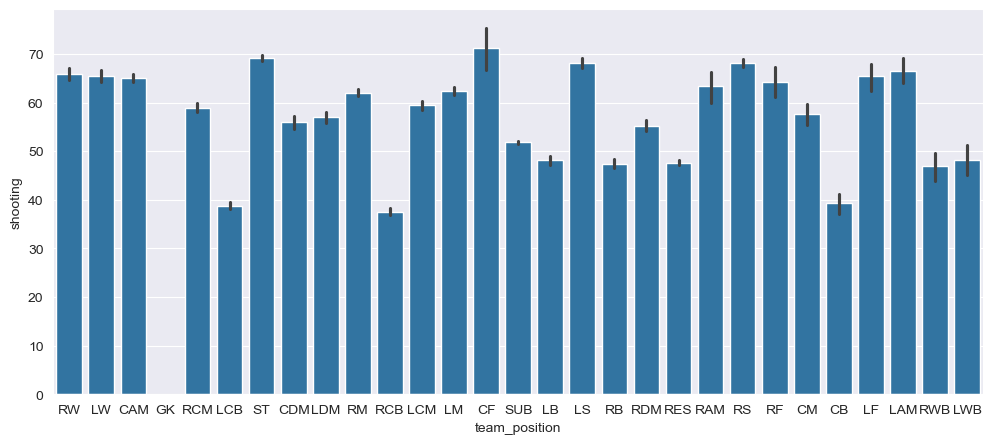

In [46]:
# IMPACT OF TEAM POSITION TO SHOOTING
plt.figure(figsize=(12,5))
sns.barplot(x='team_position',y='shooting',data=df)
plt.show()

In this plot we clearly seent that GK team position has no shooting score.
CF team position has maximum shooting score.

Wage comparison for Striker (ST), Right-Winger (RW), and Left-Winger (LW)

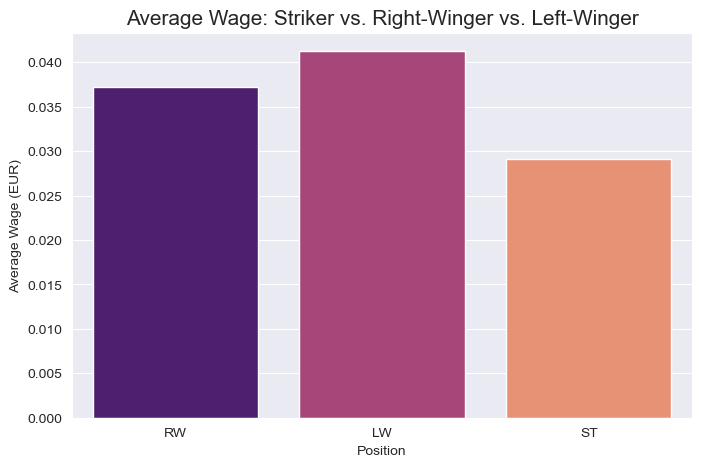

In [148]:

filtered_offensive = df[df['team_position'].isin([21, 9, 10])].copy()


label_map = {21: 'ST', 9: 'RW', 10: 'LW'}
filtered_offensive['pos_label'] = filtered_offensive['team_position'].map(label_map)

plt.figure(figsize=(8,5))
sns.barplot(x='pos_label', y='wage_eur', data=filtered_offensive, palette='magma', ci=None)
plt.title('Average Wage: Striker vs. Right-Winger vs. Left-Winger', fontsize=15)
plt.xlabel('Position')
plt.ylabel('Average Wage (EUR)')
plt.show()


In [149]:
avg_wages = filtered_offensive.groupby('pos_label')['wage_eur'].mean().sort_values(ascending=False)
print("Average Wages per Position:")
print(avg_wages)

Average Wages per Position:
pos_label
LW    0.041254
RW    0.037212
ST    0.029119
Name: wage_eur, dtype: float64


HERE SOME CONDITION & PLOTTING

● Prepare a rank ordered list of top 10 countries with most players. Which
countries are producing the most footballers that play at this level?

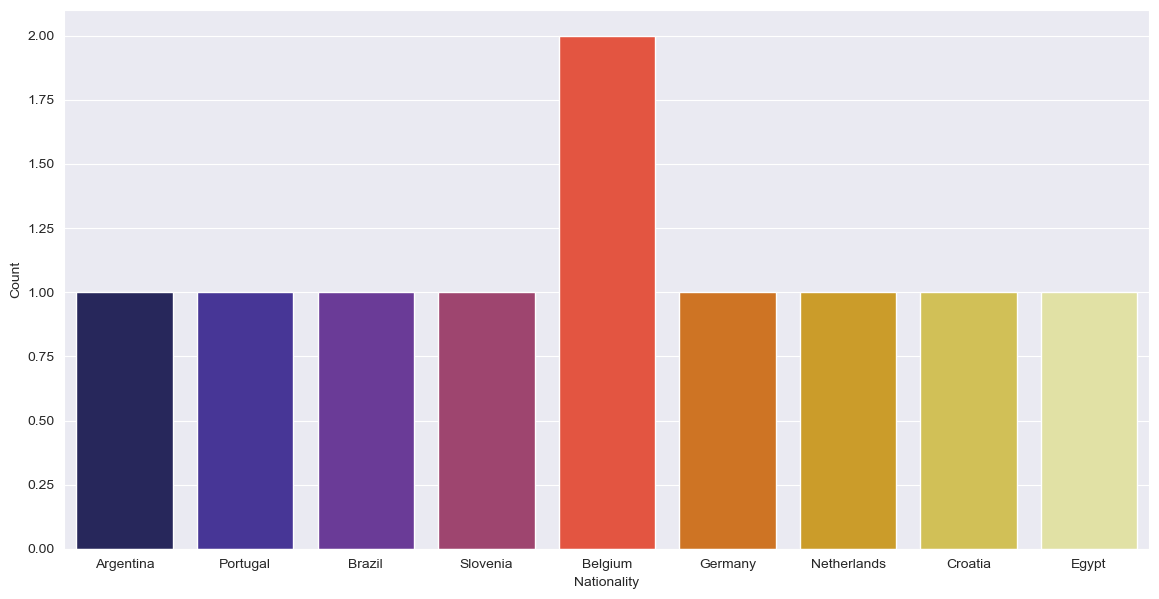

In [48]:
plt.figure(figsize=(14,7))
sns.countplot(x='nationality',data=df.head(10),palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

Most of the belgium country player in to 10

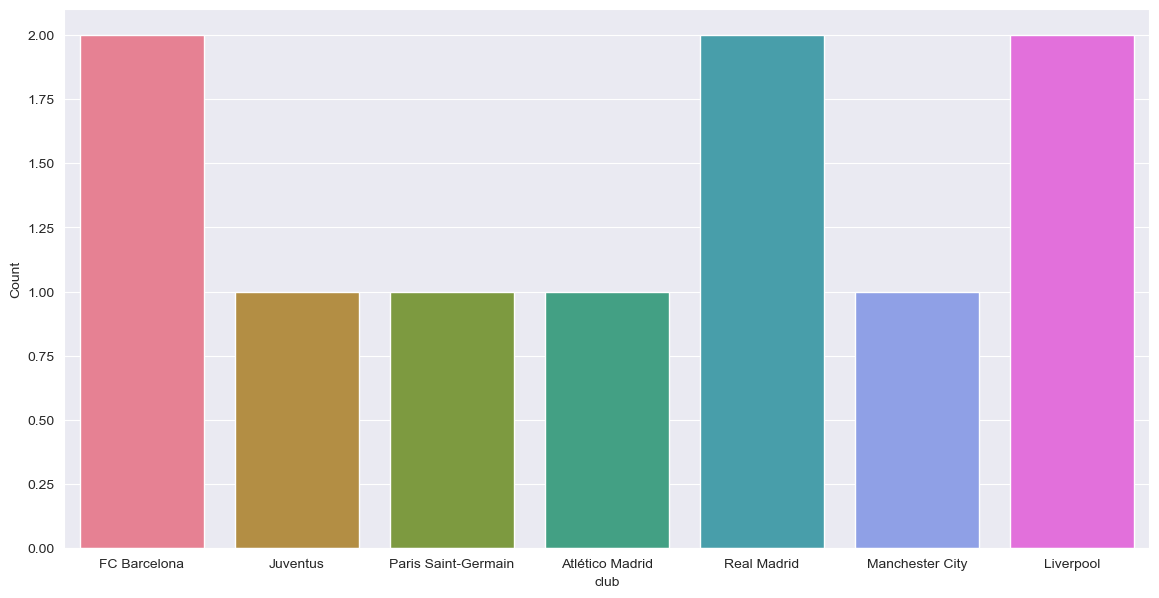

In [49]:
plt.figure(figsize=(14,7))
sns.countplot(x='club',data=df.head(10),palette='husl')
plt.xlabel('club')
plt.ylabel('Count')
plt.show()

most of the Fc Barcelona. real madrid, and liver pool club player in top 10.

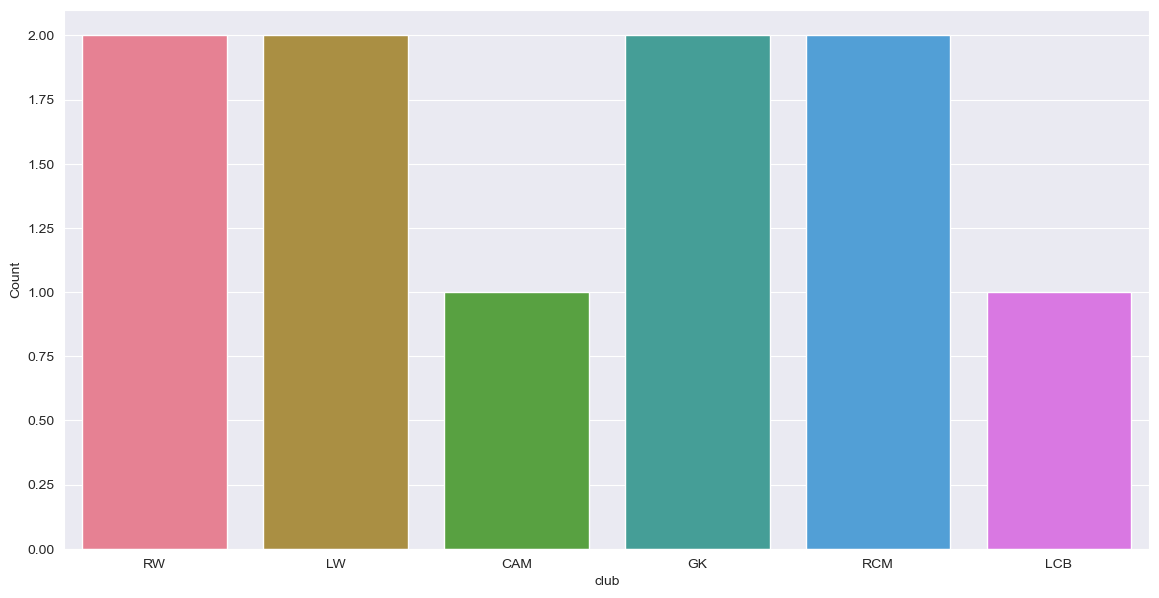

In [50]:
plt.figure(figsize=(14,7))
sns.countplot(x='team_position',data=df.head(10),palette='husl')
plt.xlabel('club')
plt.ylabel('Count')
plt.show()

Most of the RW, LW, GK, RCM team position in top 10

In [51]:
feature = df[['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']]
compare = feature.head()
compare = compare.set_index('short_name')
compare.head()

overall  potential  pace  shooting  passing  dribbling  \
short_name                                                                  
L. Messi                94         94  87.0      92.0     92.0       96.0   
Cristiano Ronaldo       93         93  90.0      93.0     82.0       89.0   
Neymar Jr               92         92  91.0      85.0     87.0       95.0   
J. Oblak                91         93   NaN       NaN      NaN        NaN   
E. Hazard               91         91  91.0      83.0     86.0       94.0   

                   defending  physic  
short_name                            
L. Messi                39.0    66.0  
Cristiano Ronaldo       35.0    78.0  
Neymar Jr               32.0    58.0  
J. Oblak                 NaN     NaN  
E. Hazard               35.0    66.0

In [52]:
df.sort_values(by=['value_eur','release_clause_eur'],ascending=[0,1]).head()

sofifa_id                                         player_url  \
2      190871  https://sofifa.com/player/190871/neymar-da-sil...   
0      158023  https://sofifa.com/player/158023/lionel-messi/...   
10     231747  https://sofifa.com/player/231747/kylian-mbappe...   
5      192985  https://sofifa.com/player/192985/kevin-de-bruy...   
4      183277  https://sofifa.com/player/183277/eden-hazard/2...   

      short_name                       long_name  age         dob  height_cm  \
2      Neymar Jr   Neymar da Silva Santos Junior   27  1992-02-05        175   
0       L. Messi  Lionel Andrés Messi Cuccittini   32  1987-06-24        170   
10     K. Mbappé                   Kylian Mbappé   20  1998-12-20        178   
5   K. De Bruyne                 Kevin De Bruyne   28  1991-06-28        181   
4      E. Hazard                     Eden Hazard   28  1991-01-07        175   

    weight_kg nationality                 club  ...  lwb  ldm  cdm  rdm rwb  \
2          68      Brazil  Paris Saint-Germain  ...   66   61   61   61  66   
0          72   Argentina         FC Barcelona  ...   68   66   66   66  68   
10         73      France  Paris Saint-Germain  ...   66   62   62   62  66   
5          70     Belgium      Manchester City  ...   77   77   77   77  77   
4          74     Belgium          Real Madrid  ...   66   63   63   63  66   

    lb  lcb  cb  rcb  rb  
2   61   46  46   46  61  
0   63   52  52   52  63  
10  63   54  54   54  63  
5   73   66  66   66  73  
4   61   49  49   49  61  

[5 rows x 104 columns]

DATA PREPROCESSING

In [53]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [55]:
pd.set_option('display.max_rows',None)
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [56]:
# Create function to check missing value with percentage
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(df)

Missing Number  Missing Percentage
sofifa_id                                0            0.000000
player_url                               0            0.000000
short_name                               0            0.000000
long_name                                0            0.000000
age                                      0            0.000000
dob                                      0            0.000000
height_cm                                0            0.000000
weight_kg                                0            0.000000
nationality                              0            0.000000
club                                     0            0.000000
overall                                  0            0.000000
potential                                0            0.000000
value_eur                                0            0.000000
wage_eur                                 0            0.000000
player_positions                         0            0.000000
preferred_foot                           0            0.000000
international_reputation                 0            0.000000
weak_foot                                0            0.000000
skill_moves                              0            0.000000
work_rate                                0            0.000000
body_type                                0            0.000000
real_face                                0            0.000000
release_clause_eur                    1298            7.101433
player_tags                          16779           91.798884
team_position                          240            1.313054
team_jersey_number                     240            1.313054
loaned_from                          17230           94.266331
joined                                1288            7.046723
contract_valid_until                   240            1.313054
nation_position                      17152           93.839589
nation_jersey_number                 17152           93.839589
pace                                  2036           11.139074
shooting                              2036           11.139074
passing                               2036           11.139074
dribbling                             2036           11.139074
defending                             2036           11.139074
physic                                2036           11.139074
gk_diving                            16242           88.860926
gk_handling                          16242           88.860926
gk_kicking                           16242           88.860926
gk_reflexes                          16242           88.860926
gk_speed                             16242           88.860926
gk_positioning                       16242           88.860926
player_traits                        10712           58.605974
attacking_crossing                       0            0.000000
attacking_finishing                      0            0.000000
attacking_heading_accuracy               0            0.000000
attacking_short_passing                  0            0.000000
attacking_volleys                        0            0.000000
skill_dribbling                          0            0.000000
skill_curve                              0            0.000000
skill_fk_accuracy                        0            0.000000
skill_long_passing                       0            0.000000
skill_ball_control                       0            0.000000
movement_acceleration                    0            0.000000
movement_sprint_speed                    0            0.000000
movement_agility                         0            0.000000
movement_reactions                       0            0.000000
movement_balance                         0            0.000000
power_shot_power                         0            0.000000
power_jumping                            0            0.000000
power_stamina                            0            0.000000
power_strength                           0            0.000

IMPUTE MISSING VALUE

1.NUMERICAL

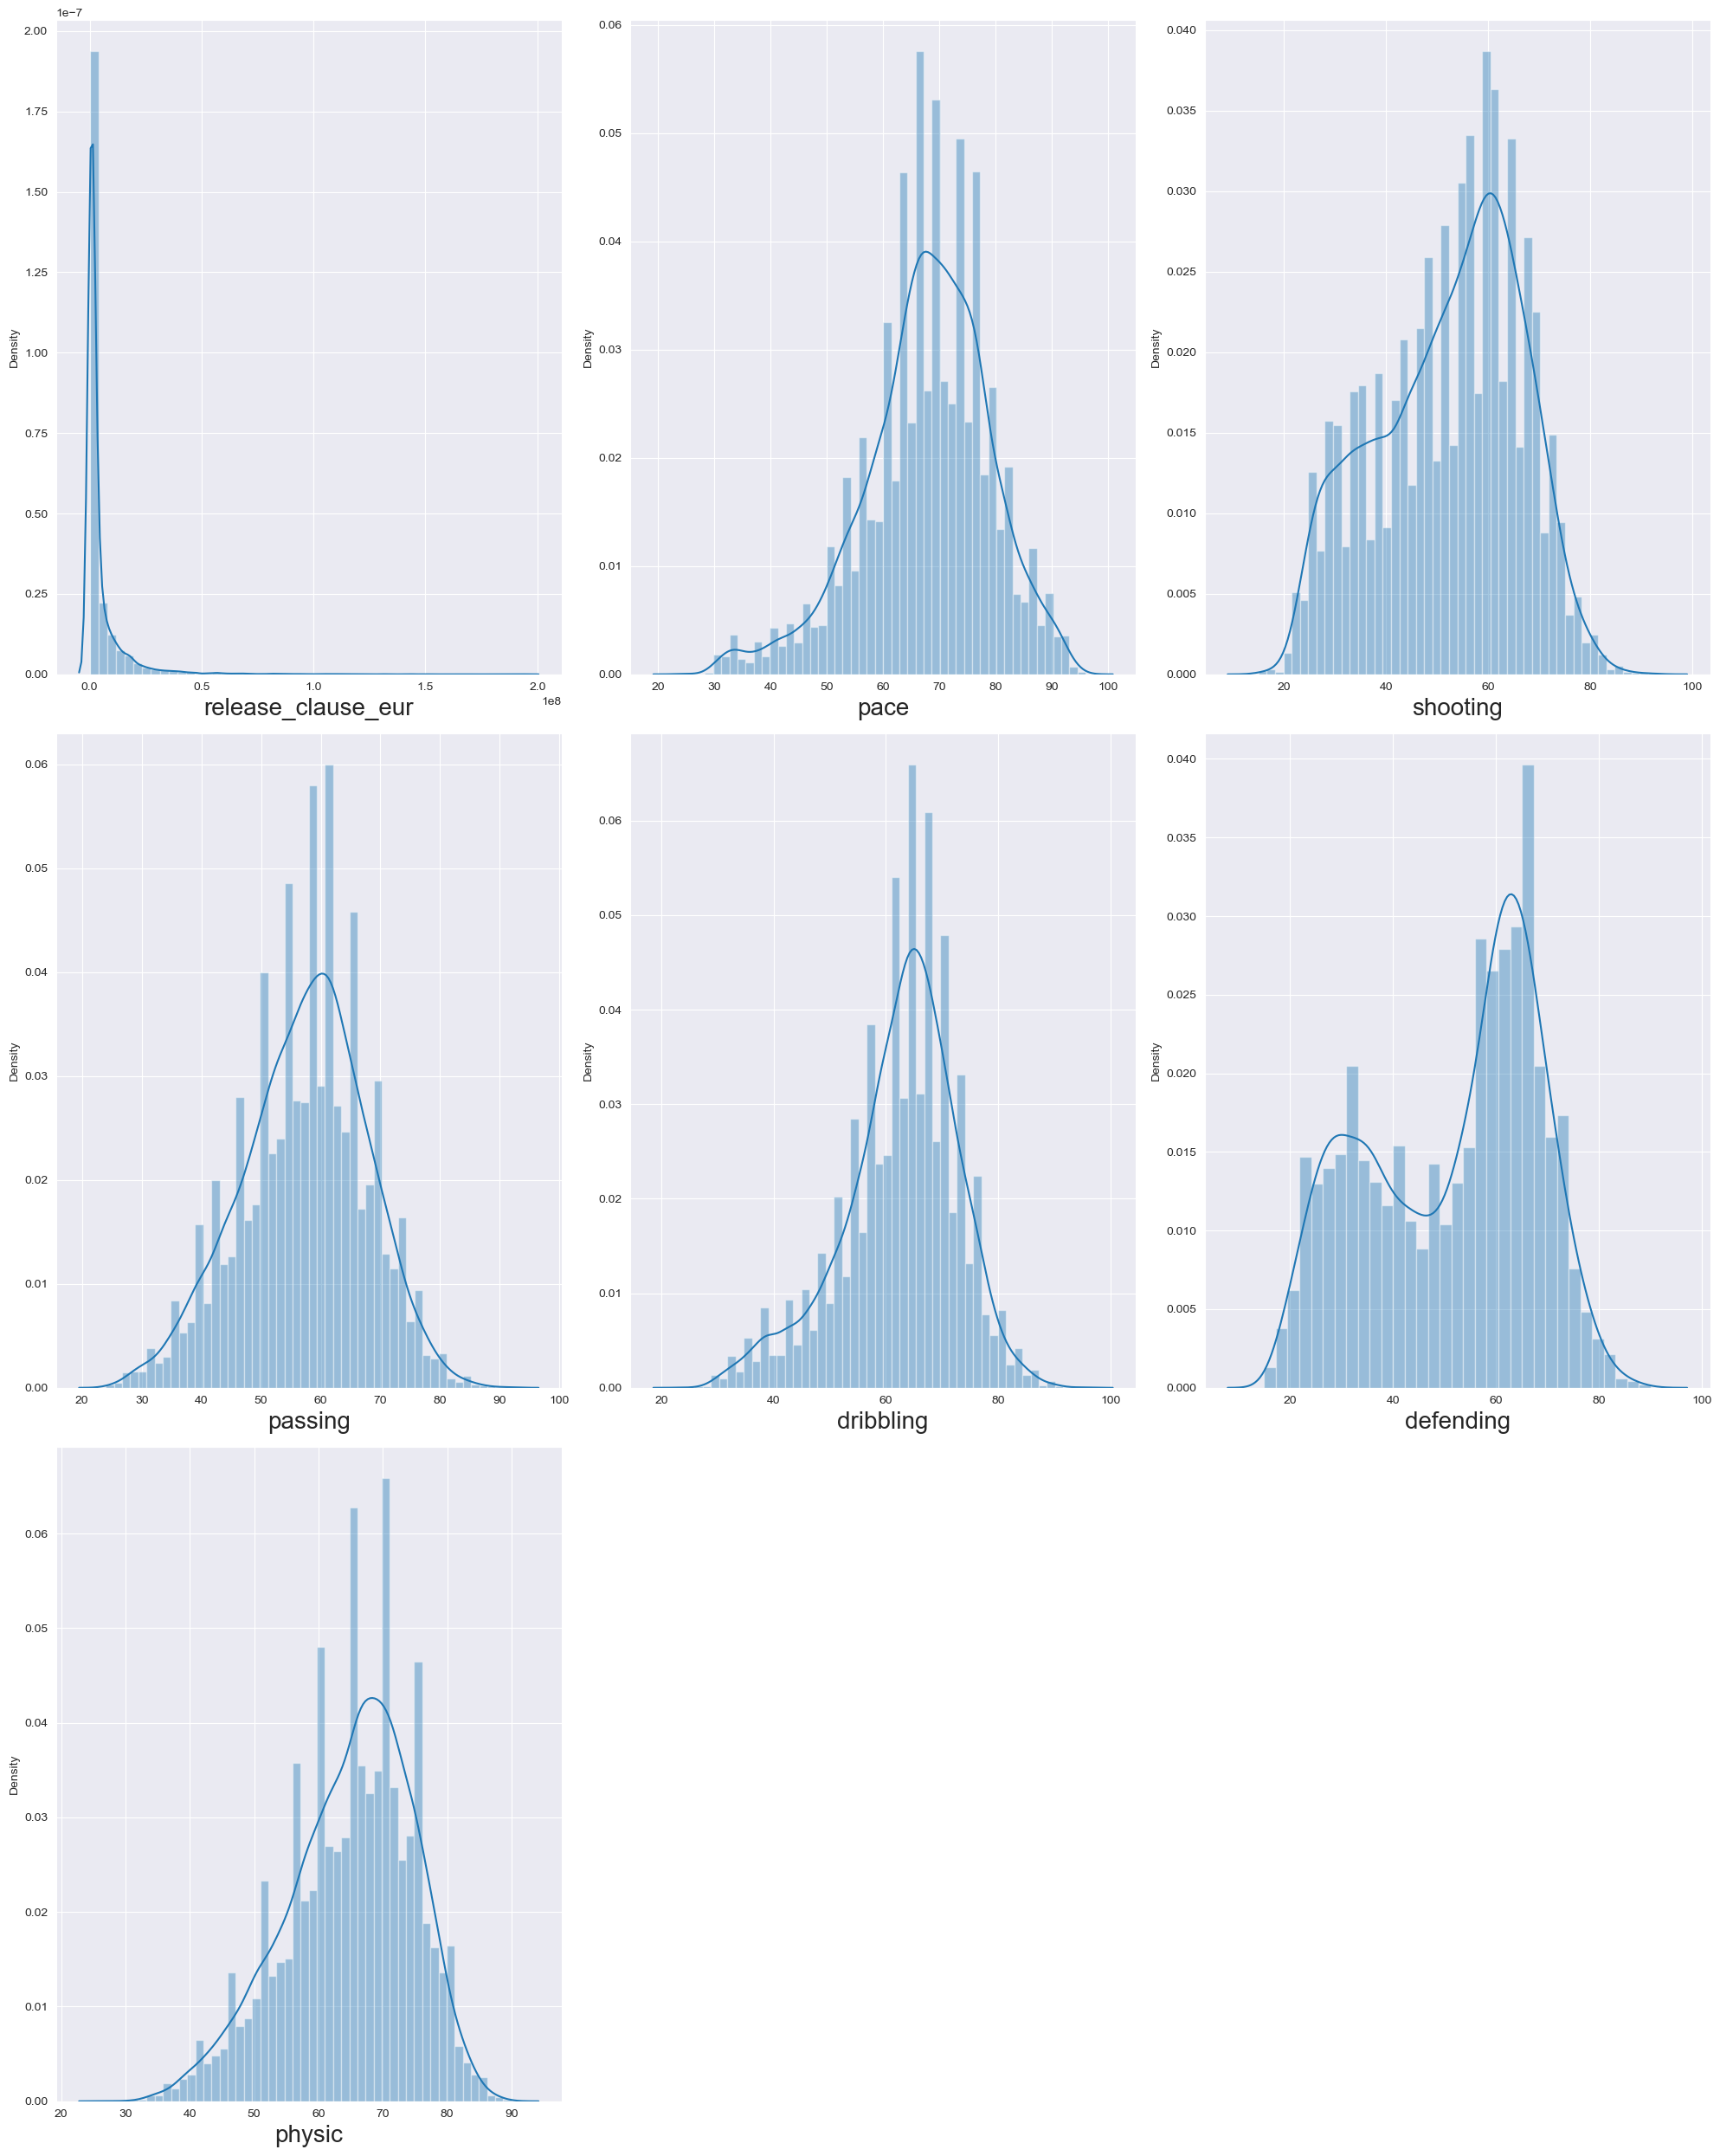

In [57]:
dist = df[['release_clause_eur','pace','shooting','passing','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in dist: # iteration of columns / acessing the columns from  dataset 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=dist[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

In [58]:
# Impute missing value using median because distribution is not normal
df.loc[df['release_clause_eur'].isnull()==True,'release_clause_eur']=df['release_clause_eur'].median()
df.loc[df['pace'].isnull()==True,'pace']=df['pace'].median()
df.loc[df['shooting'].isnull()==True,'shooting']=df['shooting'].median()
df.loc[df['passing'].isnull()==True,'passing']=df['passing'].median()
df.loc[df['dribbling'].isnull()==True,'dribbling']=df['dribbling'].median()
df.loc[df['defending'].isnull()==True,'defending']=df['defending'].median()
df.loc[df['physic'].isnull()==True,'physic']=df['physic'].median()

In [59]:
# Check missing value after imputation
print('release_clause_eur:',df['release_clause_eur'].isnull().sum())
print('pace:',df['pace'].isnull().sum())
print('shooting:',df['shooting'].isnull().sum())
print('passing:',df['passing'].isnull().sum())
print('dribbling:',df['dribbling'].isnull().sum())
print('defending:',df['defending'].isnull().sum())
print('physic:',df['physic'].isnull().sum())

release_clause_eur: 0
pace: 0
shooting: 0
passing: 0
dribbling: 0
defending: 0
physic: 0


2.CATEGORICAL

In [60]:
df.team_position.value_counts().head()

team_position
SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
Name: count, dtype: int64

In [61]:
df['team_position'] = df['team_position'].replace(np.nan,'SUB')

In [62]:
df['team_position'].isnull().sum()

0

1.PREFERRED FOOT

In [63]:
df.preferred_foot.value_counts()

preferred_foot
Right    13960
Left      4318
Name: count, dtype: int64

In [64]:
df.preferred_foot = df.preferred_foot.map({'Right':1,'Left':0})

2.TEAM POSITION

In [65]:
df.team_position.value_counts()

team_position
SUB    8060
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: count, dtype: int64

In [66]:
df.team_position = df.team_position.map({'SUB':28,'RES':27,'GK':26,'RCB':25,'LCB':24,'RB':23,'LB':22,'ST':21,
                                            'RCM':20,'LCM':19,'RM':18,'LM':17,'CAM':16,'RDM':15,'LDM':14,'RS':13,
                                            'LS':12,'CDM':11,'LW':10,'RW':9,'CB':8,'CM':7,'RWB':6,'LWB':5,'RAM':4,
                                            'LAM':3,'RF':2,'LF':1,'CF':0})

In [67]:
df.team_position.unique()

array([ 9, 10, 16, 26, 20, 24, 21, 11, 14, 18, 25, 19, 17,  0, 28, 22, 12,
       23, 15, 27,  4, 13,  2,  7,  8,  1,  3,  6,  5], dtype=int64)

OUTLIER HANDLING

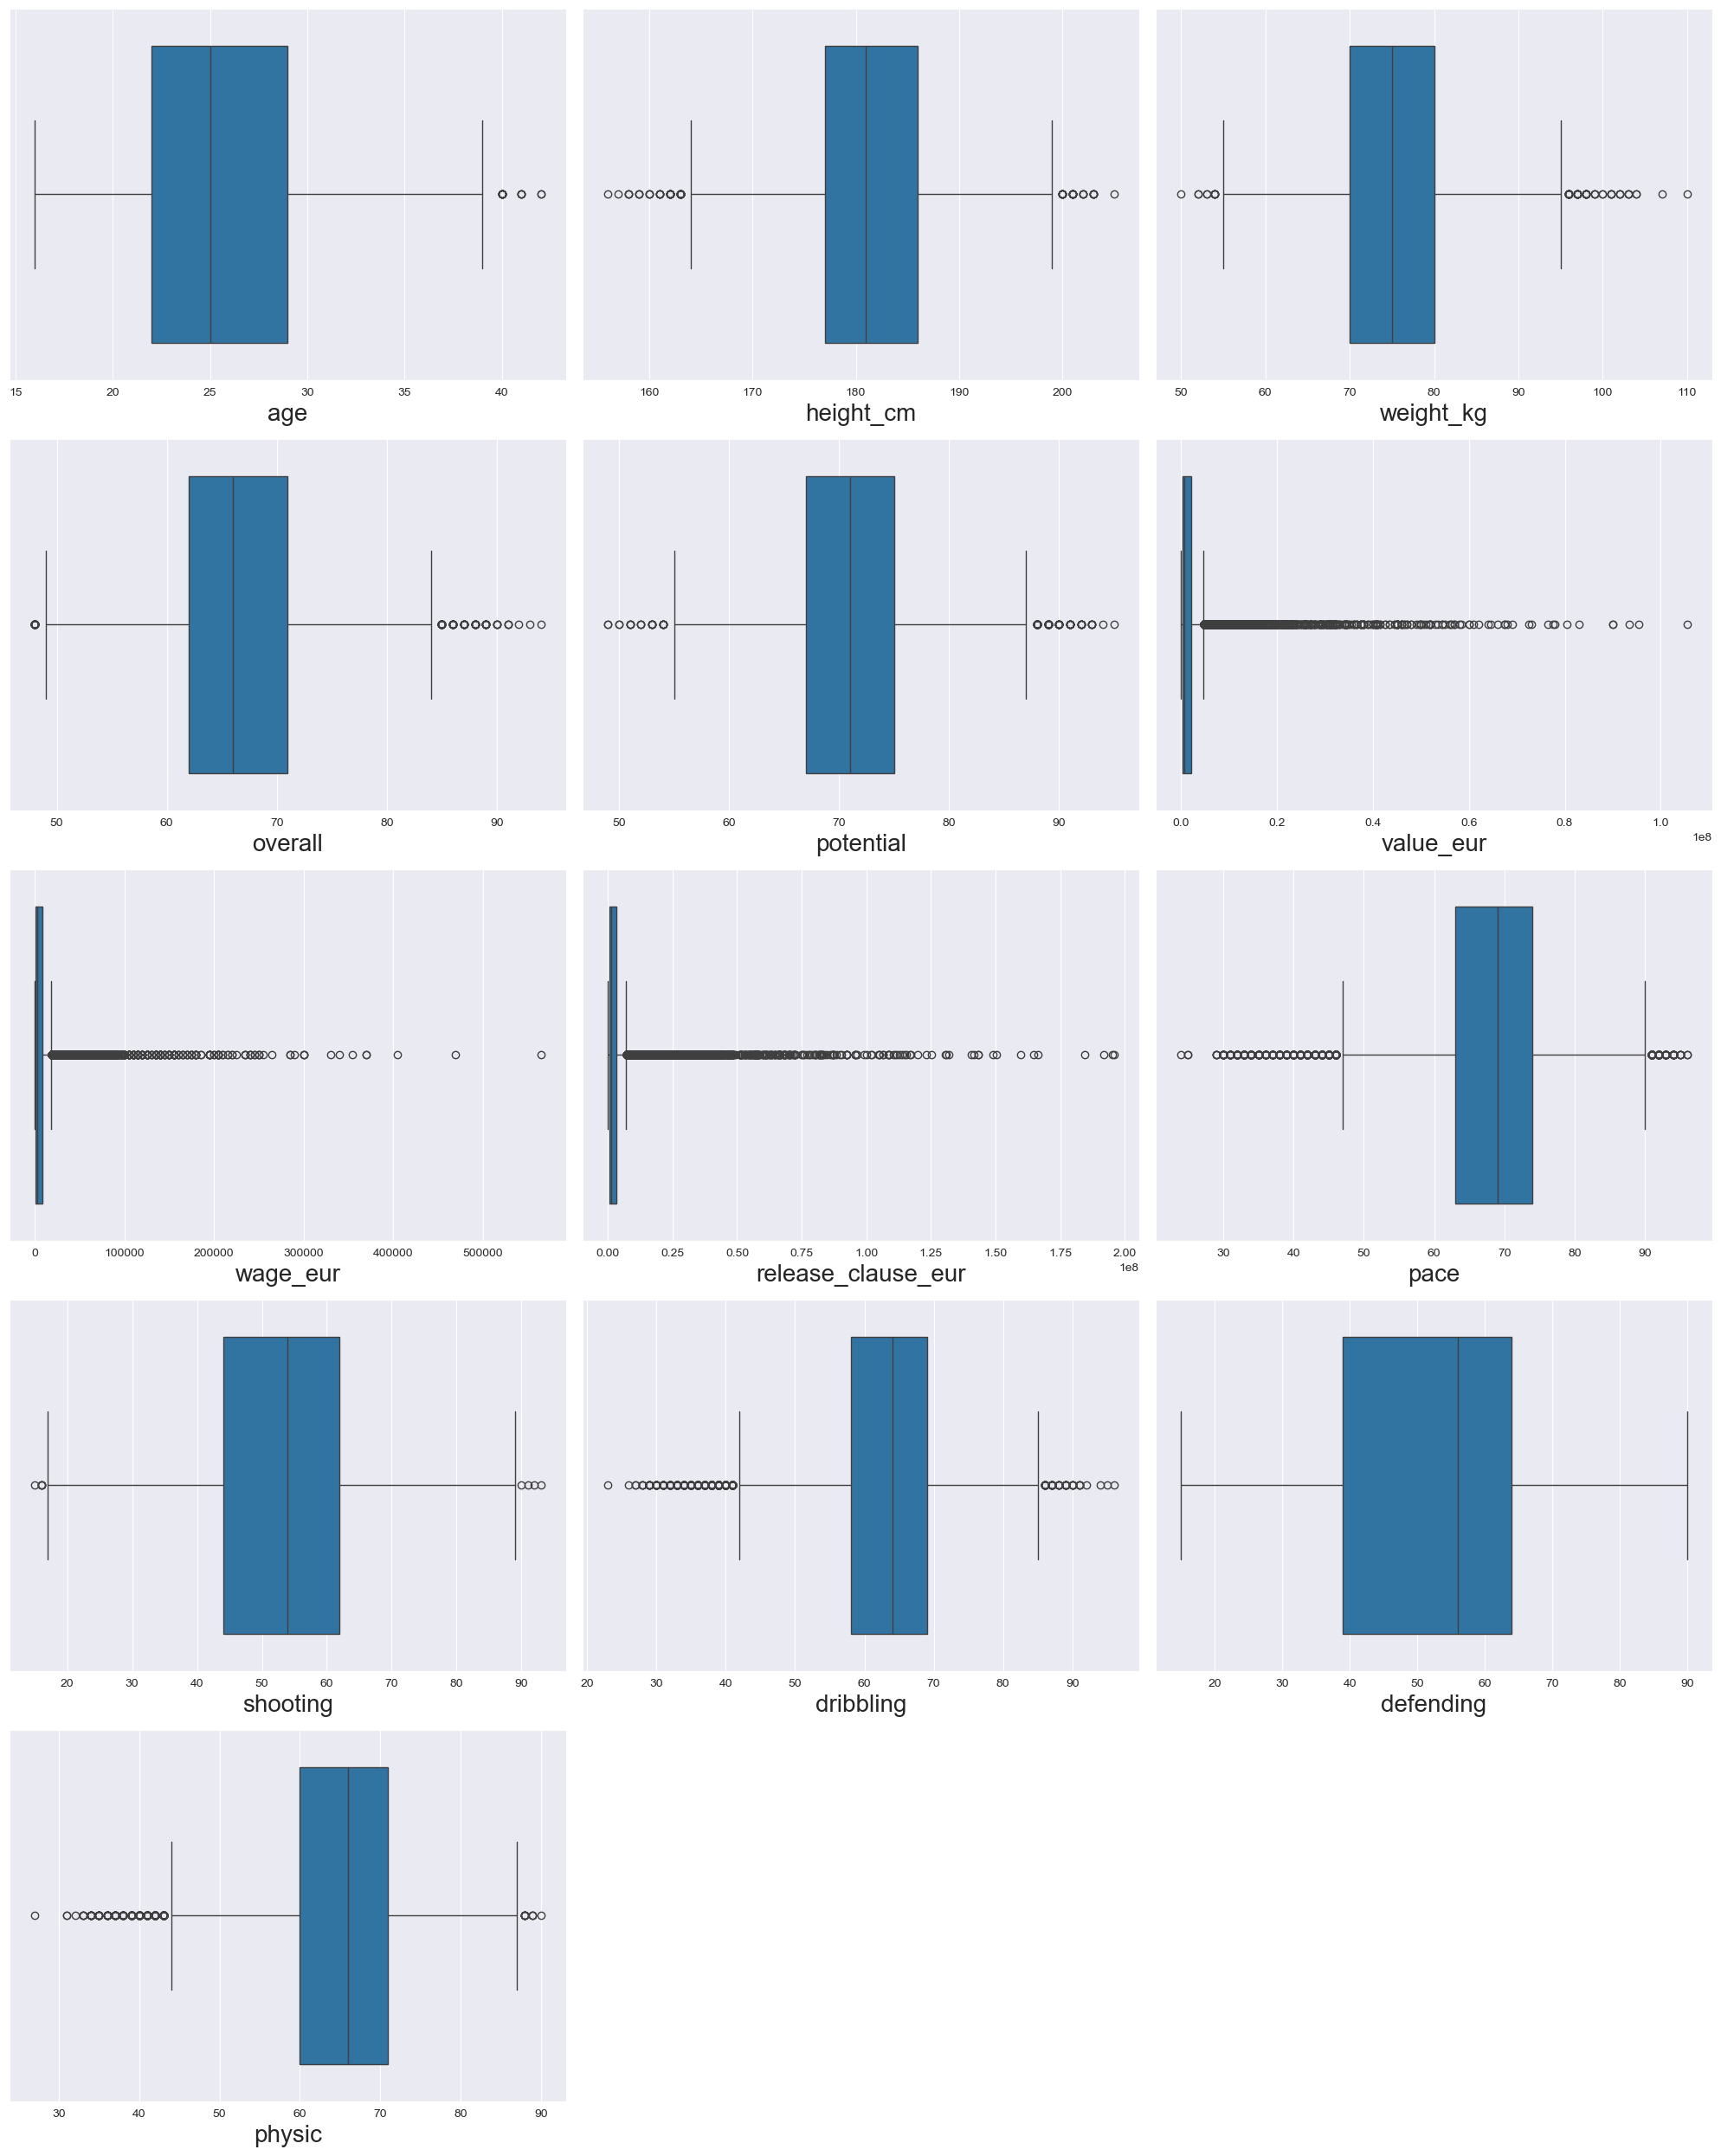

In [68]:
out = df[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) 
plotno = 1 

for column in out: 
    if plotno<=16:    
        plt.subplot(5,3,plotno) 
        sns.boxplot(x=out[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show() 

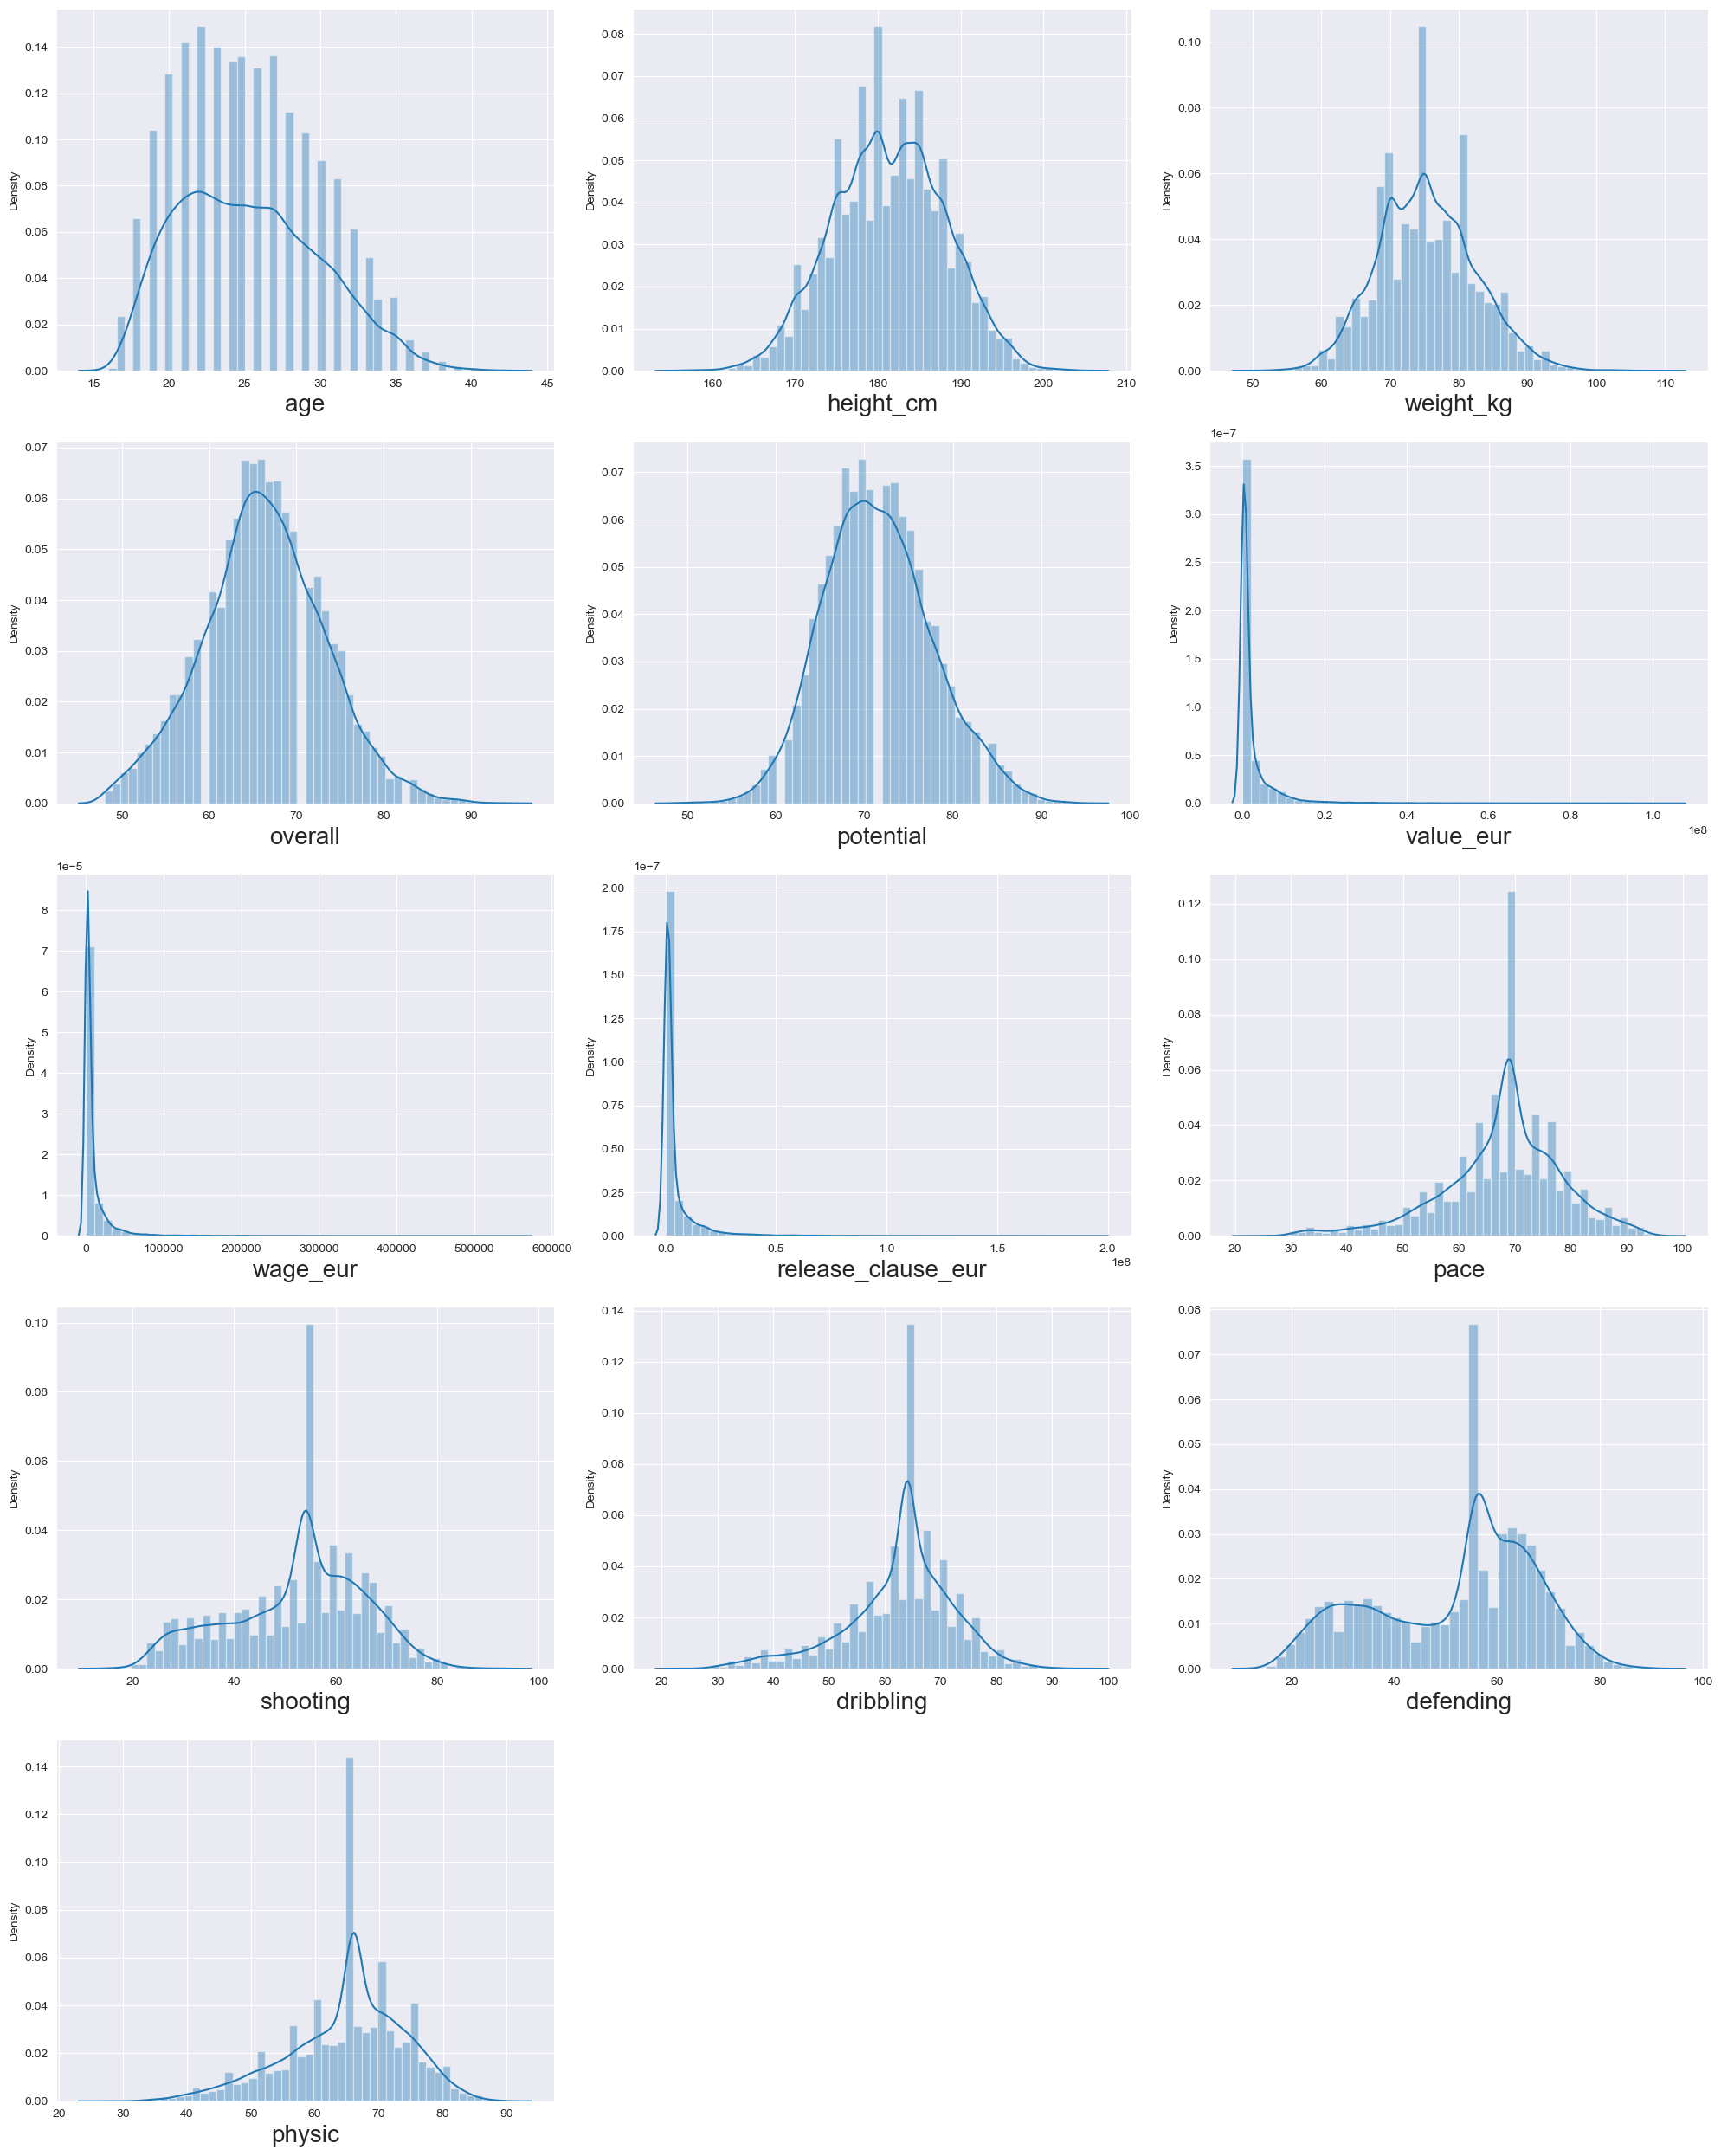

In [69]:
dist1 = df[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) 
plotno = 1 

for column in dist1: 
    if plotno<=15:    
        plt.subplot(5,3,plotno) 
        sns.distplot(x=out[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show() 

1.AGE

In [70]:
upper_limit = df.age.mean() + 3*df.age.std()
print("Upper limit:",upper_limit)
lower_limit = df.age.mean() - 3*df.age.std()
print("Lower limit:",lower_limit)

Upper limit: 39.25418488202056
Lower limit: 11.312397895088532


In [71]:
len(df.loc[df['age'] > upper_limit])

19

In [72]:
df.loc[df['age'] > upper_limit,'age']=df['age'].mean()

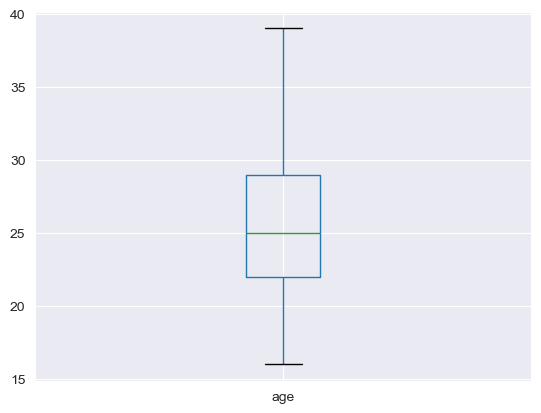

In [73]:
df.boxplot('age')
plt.show()

2.HEIGHT CM

In [74]:
upper_limit = df.height_cm.mean() + 3*df.height_cm.std()
print("Upper limit:",upper_limit)
lower_limit = df.height_cm.mean() - 3*df.height_cm.std()
print("Lower limit:",lower_limit)

Upper limit: 201.6330681374958
Lower limit: 161.09129995529332


In [75]:
len(df.loc[df['height_cm'] > upper_limit])

11

In [76]:
df.loc[df['height_cm'] <  lower_limit,'height_cm'] = df['height_cm'].mean()
df.loc[df['height_cm'] > upper_limit,'height_cm'] = df['height_cm'].mean()

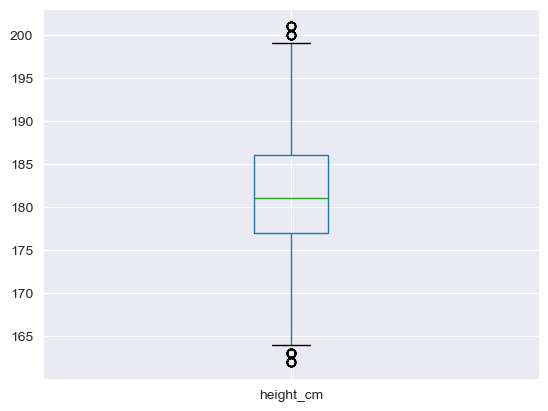

In [77]:
df.boxplot('height_cm')
plt.show()

3.WEIGHT KG

In [78]:
upper_limit = df.weight_kg.mean() + 3*df.weight_kg.std()
print("Upper limit:",upper_limit)
lower_limit = df.weight_kg.mean() - 3*df.weight_kg.std()
print("Lower limit:",lower_limit)

Upper limit: 96.41957385582987
Lower limit: 54.13311243369853


In [79]:
len(df.loc[df['weight_kg'] < lower_limit])

11

In [80]:
len(df.loc[df['weight_kg'] > upper_limit])

41

In [81]:
df.loc[df['weight_kg'] < lower_limit,'weight_kg']=df['weight_kg'].mean()
df.loc[df['weight_kg'] > upper_limit,'weight_kg']=df['weight_kg'].mean()

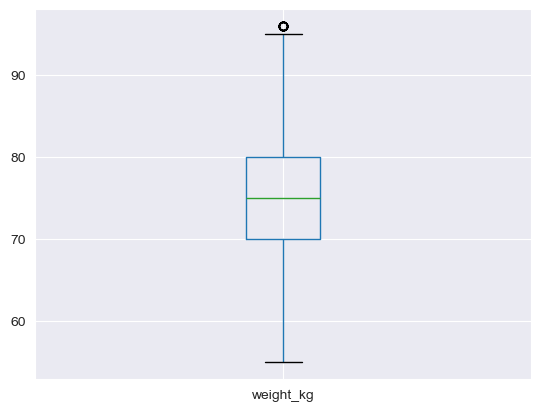

In [82]:
df.boxplot('weight_kg')
plt.show()

4.OVERALL

In [83]:
upper_limit = df.overall.mean() + 3*df.overall.std()
print("Upper limit:",upper_limit)
lower_limit = df.overall.mean() - 3*df.overall.std()
print("Lower limit:",lower_limit)

Upper limit: 87.09485374672605
Lower limit: 45.395134216946126


In [84]:
len(df.loc[df['overall'] < lower_limit])


0

In [85]:
len(df.loc[df['overall'] > upper_limit])

40

In [86]:
df.loc[df['overall'] > upper_limit, 'overall'] = df['overall'].mean()

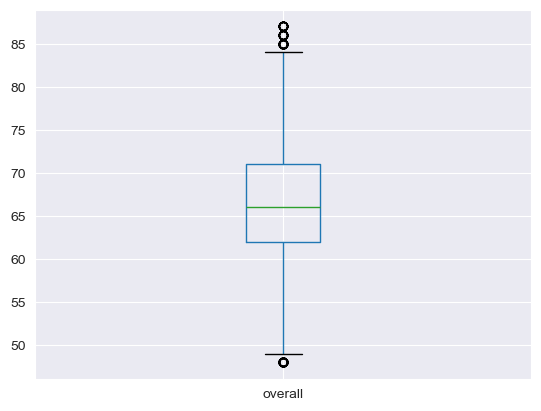

In [87]:
df.boxplot('overall')
plt.show()

5.POTENTIAL

In [88]:
upper_limit = df.potential.mean() + 3*df.potential.std()
print("Upper limit:",upper_limit)
lower_limit = df.potential.mean() - 3*df.potential.std()
print("Lower limit:",lower_limit)

Upper limit: 89.96589419280835
Lower limit: 53.12787974307086


In [89]:
len(df.loc[df['potential'] < lower_limit])

17

In [90]:
len(df.loc[df['potential'] > upper_limit])

39

In [91]:
df.loc[df['potential'] < lower_limit,'potential']=df['potential'].mean()
df.loc[df['potential'] > upper_limit,'potential']=df['potential'].mean()

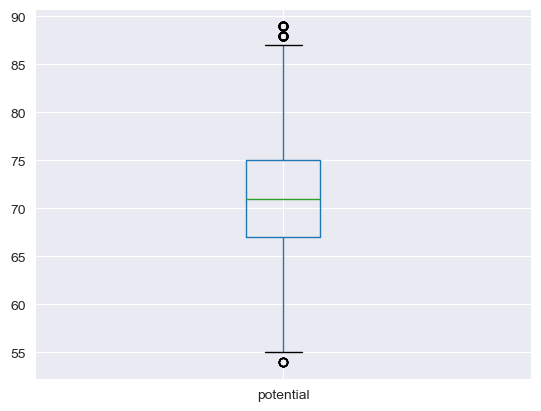

In [92]:
df.boxplot('potential')
plt.show()

IQR

1.VALUE EUR

In [93]:

from scipy import stats
iqr = stats.iqr(df['value_eur'],interpolation='midpoint')
print("IQR",iqr)

Q1 = df['value_eur'].quantile(0.25)  
Q3 = df['value_eur'].quantile(0.75) 


min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 1775000.0
minimum limit -2337500.0
maximum limit 4762500.0


In [94]:
len(df.loc[df['value_eur'] > max_limit])

2511

2.WAGE EUR

In [95]:
iqr = stats.iqr(df['wage_eur'],interpolation='midpoint')
print("IQR",iqr)


Q1 = df['wage_eur'].quantile(0.25)  
Q3 = df['wage_eur'].quantile(0.75)  


min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)

max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 7000.0
minimum limit -9500.0
maximum limit 18500.0


In [96]:
len(df.loc[df['wage_eur'] > max_limit])

2360

3.RELEASE CLASUSE EUR

In [97]:
iqr = stats.iqr(df['release_clause_eur'],interpolation='midpoint')
print("IQR",iqr)

Q1 = df['release_clause_eur'].quantile(0.25)
Q3 = df['release_clause_eur'].quantile(0.75)  


min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 2604000.0
minimum limit -3310000.0
maximum limit 7106000.0


In [98]:
len(df.loc[df['release_clause_eur'] > max_limit])

2809

4.PACE

In [99]:
iqr = stats.iqr(df['pace'],interpolation='midpoint')
print("IQR",iqr)


Q1 = df['pace'].quantile(0.25)  
Q3 = df['pace'].quantile(0.75)  


min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 11.0
minimum limit 46.5
maximum limit 90.5


In [100]:
len(df.loc[df['pace'] < min_limit])

766

In [101]:

len(df.loc[df['pace'] > max_limit])

188

In [102]:

df.loc[df['pace'] < min_limit,'pace'] = df['pace'].median()
df.loc[df['pace'] > max_limit,'pace'] = df['pace'].median()

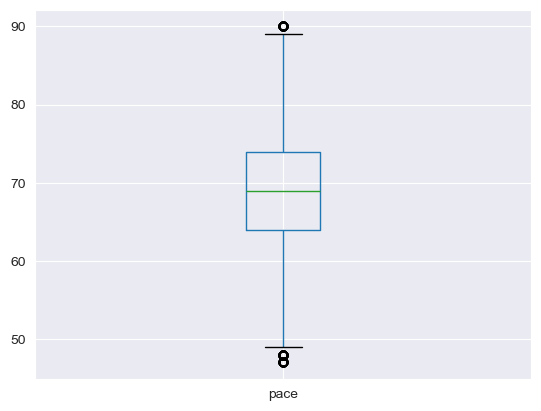

In [103]:
df.boxplot('pace')
plt.show()

5.SHOOTING

In [104]:
iqr = stats.iqr(df['shooting'],interpolation='midpoint')
print("IQR",iqr)


Q1 = df['shooting'].quantile(0.25)  
Q3 = df['shooting'].quantile(0.75)  


min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 18.0
minimum limit 17.0
maximum limit 89.0


In [105]:
len(df.loc[df['shooting'] < min_limit])

5

In [106]:
len(df.loc[df['shooting'] > max_limit])

4

In [107]:
df.loc[df['shooting'] < min_limit,'shooting'] = df['shooting'].median()
df.loc[df['shooting'] > max_limit,'shooting'] = df['shooting'].median()

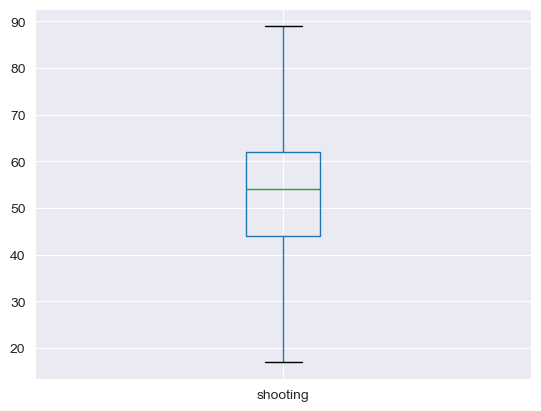

In [108]:
df.boxplot('shooting')
plt.show()

6.DRIBBLING

In [109]:
iqr = stats.iqr(df['dribbling'],interpolation='midpoint')
print("IQR",iqr)

Q1 = df['dribbling'].quantile(0.25)  
Q3 = df['dribbling'].quantile(0.75) 


min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 11.0
minimum limit 41.5
maximum limit 85.5


In [110]:

len(df.loc[df['dribbling'] < min_limit])

740

In [111]:
len(df.loc[df['dribbling'] > max_limit])

74

In [112]:
df.loc[df['dribbling'] > max_limit,'dribbling']=df['dribbling'].median()

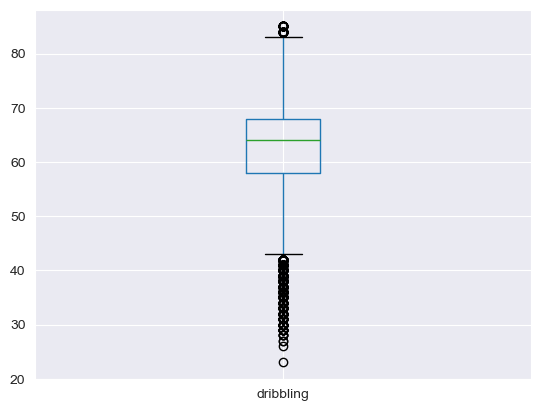

In [113]:
df.boxplot('dribbling')
plt.show()

7.PHYSIC

In [114]:
iqr = stats.iqr(df['physic'],interpolation='midpoint')
print("IQR",iqr)


Q1 = df['physic'].quantile(0.25)  
Q3 = df['physic'].quantile(0.75)  


min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 11.0
minimum limit 43.5
maximum limit 87.5


In [115]:
len(df.loc[df['physic'] < min_limit])

421

In [116]:
len(df.loc[df['physic'] > max_limit])

12

In [117]:
df.loc[df['physic'] < min_limit,'physic']=df['physic'].median()
df.loc[df['physic'] > max_limit,'physic']=df['physic'].median()

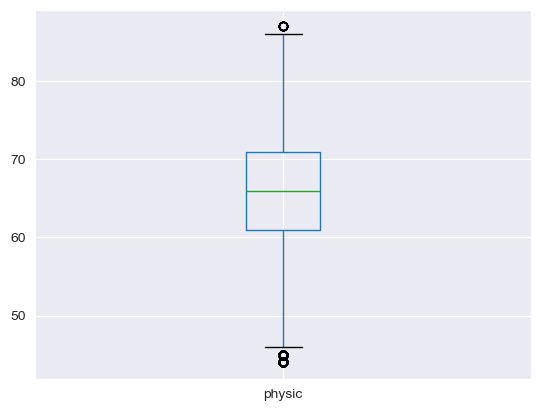

In [118]:
df.boxplot('physic')
plt.show()

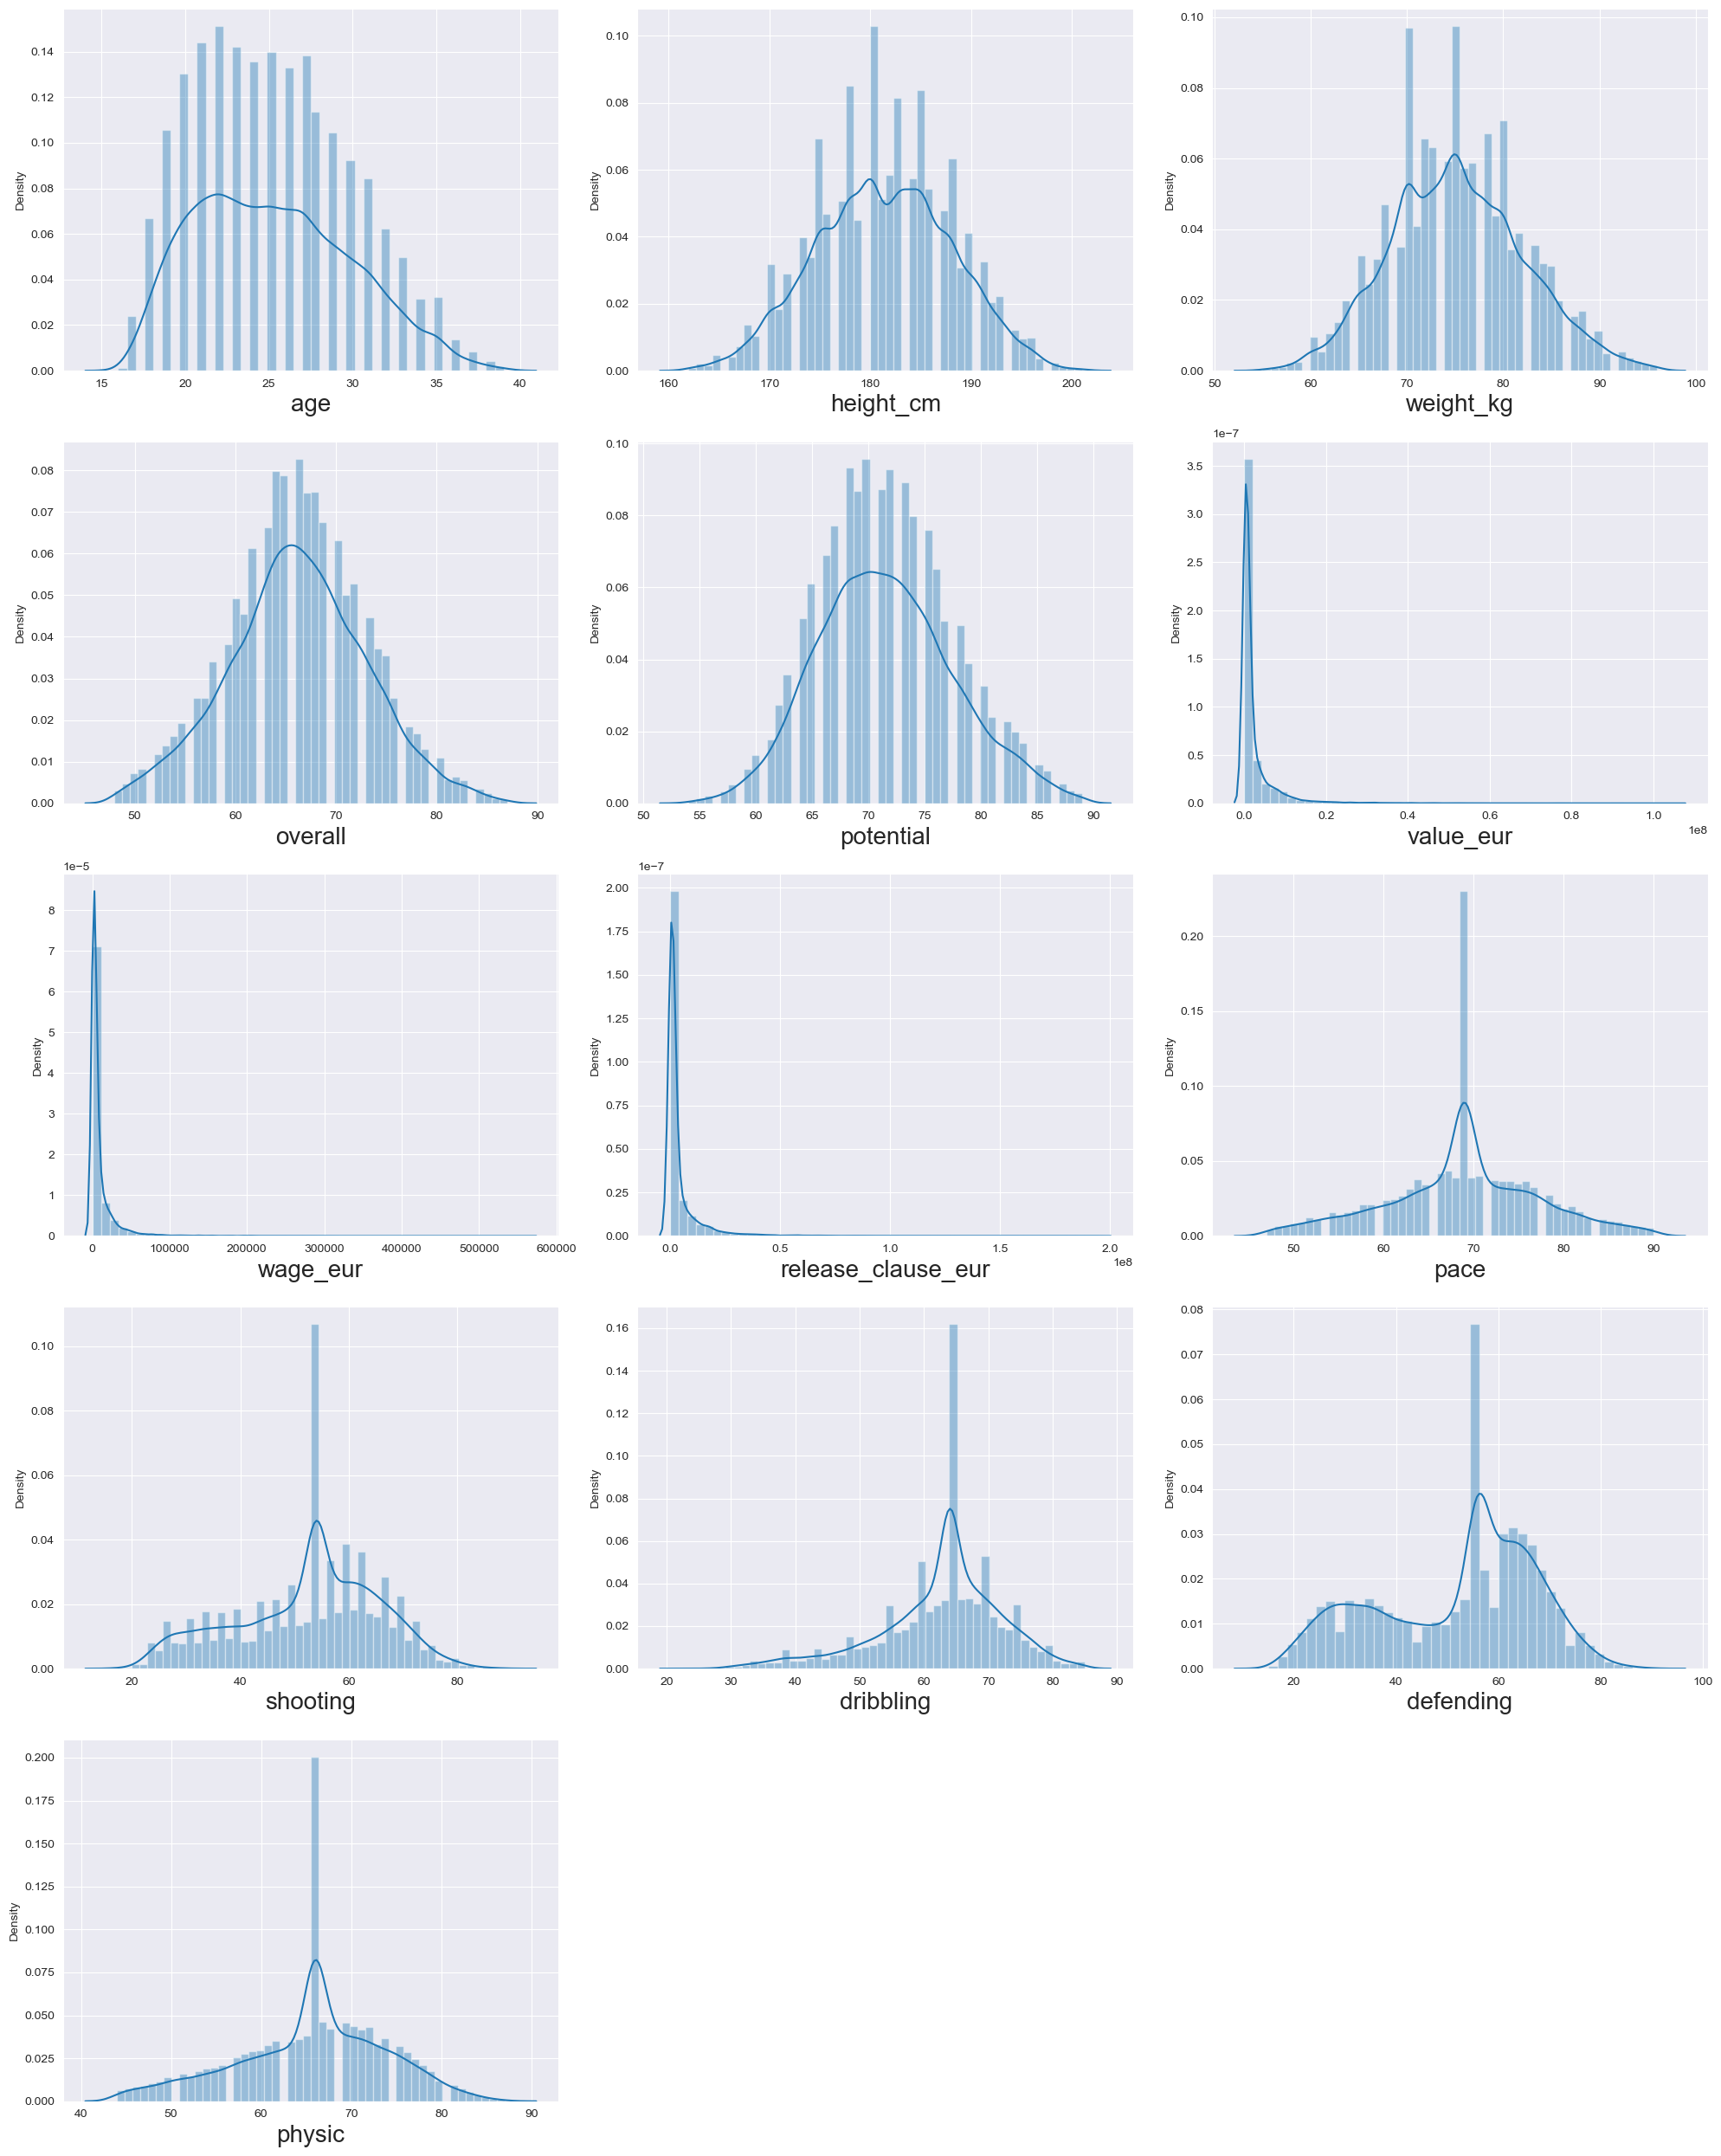

In [119]:
dist2 = df[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) 
plotno = 1 

for column in dist2: 
    if plotno<=15:   
        plt.subplot(5,3,plotno) 
        sns.distplot(x=dist2[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()

MIN-MAX SCALING

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur',
    'pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
    'skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes']]=scaler.fit_transform(df[['age','height_cm','weight_kg','overall','potential',
                'value_eur','wage_eur','release_clause_eur','pace','shooting','passing','dribbling','defending',
                'physic','attacking_crossing','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_fk_accuracy','skill_long_passing','skill_ball_control','skill_ball_control','movement_acceleration',
                'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
                'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression',
                'mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties',
                'mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle',
                'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']])

In [121]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name       age  \
0           L. Messi       Lionel Andrés Messi Cuccittini  0.695652   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro  0.782609   
2          Neymar Jr        Neymar da Silva Santos Junior  0.478261   
3           J. Oblak                            Jan Oblak  0.434783   
4          E. Hazard                          Eden Hazard  0.521739   

          dob  height_cm  weight_kg nationality                 club  ...  \
0  1987-06-24   0.205128   0.414634   Argentina         FC Barcelona  ...   
1  1985-02-05   0.641026   0.682927    Portugal             Juventus  ...   
2  1992-02-05   0.333333   0.317073      Brazil  Paris Saint-Germain  ...   
3  1993-01-07   0.666667   0.780488    Slovenia      Atlético Madrid  ...   
4  1991-01-07   0.333333   0.463415     Belgium          Real Madrid  ...   

   lwb  ldm  cdm  rdm  rwb   lb  lcb   cb  rcb   rb  
0   68   66   66   66   68   63   52   52   52   63  
1   65   61   61   61   65   61   53   53   53   61  
2   66   61   61   61   66   61   46   46   46   61  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4   66   63   63   63   66   61   49   49   49   61  

[5 rows x 104 columns]

FEATURE SELECTION

In [122]:
# Drop column
df.drop(['sofifa_id','player_url','short_name','long_name','dob','nationality','club','player_positions','body_type',
          'real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position',
          'nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
          'player_traits','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

In [123]:
df.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0  0.695652   0.205128   0.414634  0.46782   0.501872   0.905213  1.000000   
1  0.782609   0.641026   0.682927  0.46782   0.501872   0.554502  0.716814   
2  0.478261   0.333333   0.317073  0.46782   0.501872   1.000000  0.513274   
3  0.434783   0.666667   0.780488  0.46782   0.501872   0.734597  0.221239   
4  0.521739   0.333333   0.463415  0.46782   0.501872   0.853081  0.831858   

   preferred_foot  international_reputation  weak_foot  ...  \
0               0                         5          4  ...   
1               1                         5          4  ...   
2               1                         5          5  ...   
3               1                         3          3  ...   
4               1                         4          4  ...   

   mentality_penalties  mentality_composure  defending_marking  \
0             0.800000             1.000000           0.344086   
1             0.917647             0.988095           0.290323   
2             0.976471             0.976190           0.279570   
3             0.047059             0.666667           0.279570   
4             0.952941             0.940476           0.354839   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                   0.367816                  0.264368            0.056180   
1                   0.310345                  0.241379            0.067416   
2                   0.241379                  0.298851            0.089888   
3                   0.080460                  0.172414            0.966292   
4                   0.252874                  0.218391            0.112360   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0              0.109890             0.152174                 0.144444   
1              0.109890             0.152174                 0.144444   
2              0.087912             0.152174                 0.155556   
3              1.000000             0.836957                 0.988889   
4              0.120879             0.054348                 0.077778   

   goalkeeping_reflexes  
0              0.076923  
1              0.109890  
2              0.109890  
3              0.967033  
4              0.076923  

[5 rows x 53 columns]

In [124]:
df.corr()

age  height_cm  weight_kg   overall  \
age                         1.000000   0.081825   0.235507  0.465942   
height_cm                   0.081825   1.000000   0.758767  0.040680   
weight_kg                   0.235507   0.758767   1.000000  0.152619   
overall                     0.465942   0.040680   0.152619  1.000000   
potential                  -0.263493  -0.002573  -0.015062  0.627276   
value_eur                   0.083345   0.010298   0.049439  0.568768   
wage_eur                    0.152189   0.019599   0.063460  0.496974   
preferred_foot              0.006318   0.083465   0.076584 -0.035088   
international_reputation    0.256318   0.038448   0.089659  0.431482   
weak_foot                   0.073591  -0.173893  -0.126302  0.227064   
skill_moves                 0.048315  -0.427502  -0.347747  0.400131   
release_clause_eur          0.068669   0.011371   0.045490  0.539411   
team_position              -0.162284   0.115193   0.065831 -0.272091   
pace                       -0.066880  -0.322364  -0.271491  0.185569   
shooting                    0.223736  -0.166607  -0.073823  0.454310   
passing                     0.307117  -0.251701  -0.157103  0.627560   
dribbling                   0.152476  -0.349534  -0.251712  0.536466   
defending                   0.245411   0.226193   0.224703  0.303984   
physic                      0.377200   0.413394   0.488847  0.450878   
attacking_crossing          0.131539  -0.497228  -0.396941  0.389289   
attacking_finishing         0.081372  -0.374449  -0.288350  0.340242   
attacking_heading_accuracy  0.152823   0.011683   0.045239  0.347073   
attacking_short_passing     0.138928  -0.369700  -0.285850  0.500757   
attacking_volleys           0.145669  -0.349417  -0.257122  0.391496   
skill_dribbling             0.020140  -0.498802  -0.410895  0.370315   
skill_curve                 0.144337  -0.446248  -0.345110  0.414414   
skill_fk_accuracy           0.192761  -0.408898  -0.306789  0.387645   
skill_long_passing          0.186275  -0.333394  -0.256859  0.484578   
skill_ball_control          0.091374  -0.423454  -0.335107  0.455734   
movement_acceleration      -0.148783  -0.556172  -0.487739  0.184868   
movement_sprint_speed      -0.139705  -0.473235  -0.416660  0.197523   
movement_agility           -0.019365  -0.630700  -0.538697  0.251562   
movement_reactions          0.464196  -0.016994   0.089638  0.853851   
movement_balance           -0.087483  -0.787144  -0.662585  0.102954   
power_shot_power            0.263674  -0.172917  -0.055172  0.564511   
power_jumping               0.186651  -0.037795   0.036255  0.265549   
power_stamina               0.121348  -0.290376  -0.213391  0.370892   
power_strength              0.341898   0.532801   0.611366  0.361541   
power_long_shots            0.164369  -0.382526  -0.275923  0.424567   
mentality_aggression        0.262180  -0.044891   0.033683  0.402270   
mentality_interceptions     0.198394  -0.053660  -0.024554  0.318321   
mentality_positioning       0.089510  -0.444022  -0.351586  0.354784   
mentality_vision            0.196565  -0.369987  -0.279621  0.503976   
mentality_penalties         0.143095  -0.333836  -0.242053  0.344874   
mentality_composure         0.370790  -0.157882  -0.053074  0.713519   
defending_marking           0.159563  -0.076986  -0.045121  0.305655   
defending_standing_tackle   0.119566  -0.068870  -0.048723  0.253197   
defending_sliding_tackle    0.104168  -0.077490  -0.060501  0.223361   
goalkeeping_diving          0.107007   0.366300   0.334624 -0.017887   
goalkeeping_handling        0.109208   0.366083   0.336503 -0.018431   
goalkeeping_kicking         0.108890   0.363585   0.333002 -0.022055   
goalkeeping_positioning     0.117237   0.365901   0.337143 -0.011307   
goalkeeping_reflexes        0.108485   0.366147   0.335988 -0.017552   

                            potential  value_eur  wage_eur  preferred_foot  \
age                         -0.263493   0.083345  0.152189        

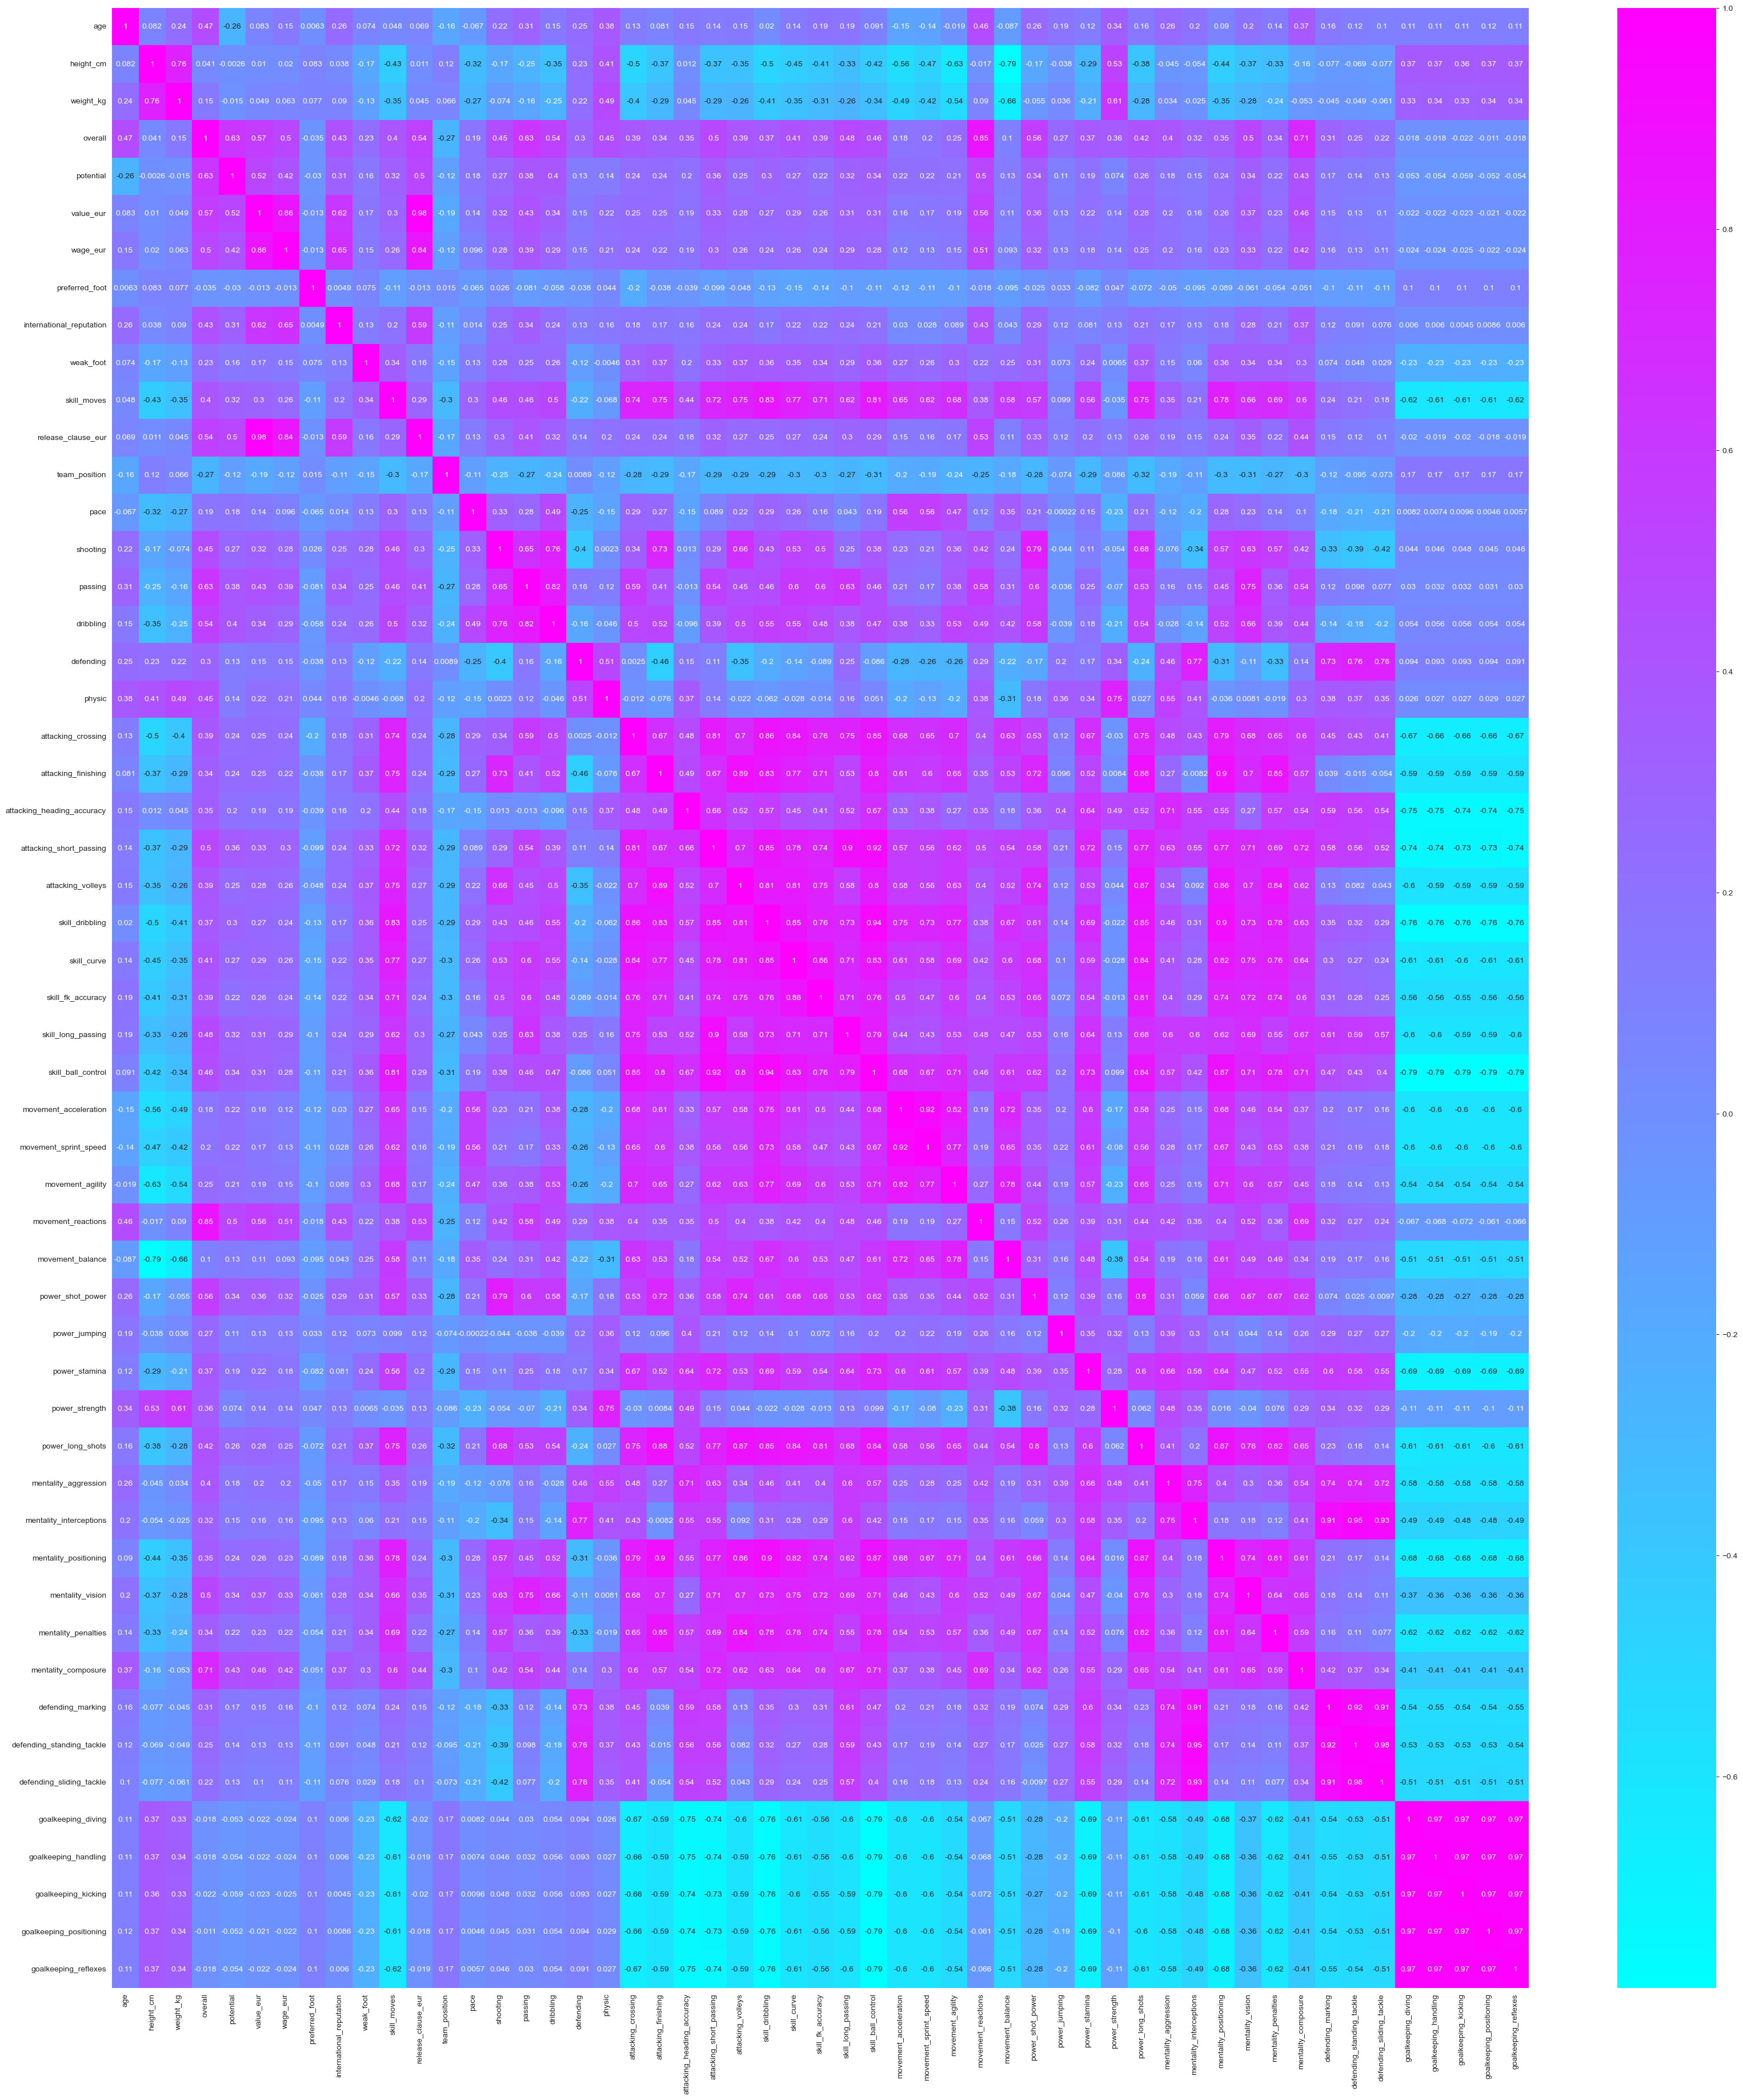

In [125]:
# Plot hitmap for better visualisation
plt.figure(figsize=(40,45))
sns.heatmap(df.corr(),annot=True,cmap='cool')
plt.show()

In [126]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1                   feature2      corr
0          release_clause_eur                  value_eur  0.979233
1                   value_eur         release_clause_eur  0.979233
2    defending_sliding_tackle  defending_standing_tackle  0.975808
3   defending_standing_tackle   defending_sliding_tackle  0.975808
4          goalkeeping_diving       goalkeeping_reflexes  0.973922
5        goalkeeping_reflexes         goalkeeping_diving  0.973922
6        goalkeeping_handling         goalkeeping_diving  0.971330
7          goalkeeping_diving       goalkeeping_handling  0.971330
8        goalkeeping_reflexes       goalkeeping_handling  0.971244
9        goalkeeping_handling       goalkeeping_reflexes  0.971244
10         goalkeeping_diving    goalkeeping_positioning  0.971218
11    goalkeeping_positioning         goalkeeping_diving  0.971218
12    goalkeeping_positioning       goalkeeping_reflexes  0.971060
13       goalkeeping_reflexes    goalkeeping_positioning  0.971060
14       goalkeeping_handling    goalkeeping_positioning  0.970517
15    goalkeeping_positioning       goalkeeping_handling  0.970517
16       goalkeeping_reflexes        goalkeeping_kicking  0.967866
17        goalkeeping_kicking       goalkeeping_reflexes  0.967866
18         goalkeeping_diving        goalkeeping_kicking  0.967057
19        goalkeeping_kicking         goalkeeping_diving  0.967057
20       goalkeeping_handling        goalkeeping_kicking  0.966508
21        goalkeeping_kicking       goalkeeping_handling  0.966508
22    goalkeeping_positioning        goalkeeping_kicking  0.966061
23        goalkeeping_kicking    goalkeeping_positioning  0.966061
24  defending_standing_tackle    mentality_interceptions  0.945287
25    mentality_interceptions  defending_standing_tackle  0.945287
26         skill_ball_control            skill_dribbling  0.943461
27            skill_dribbling         skill_ball_control  0.943461
28    mentality_interceptions   defending_sliding_tackle  0.933894
29   defending_sliding_tackle    mentality_interceptions  0.933894
30      movement_sprint_speed      movement_acceleration  0.923721
31      movement_acceleration      movement_sprint_speed  0.923721
32  defending_standing_tackle          defending_marking  0.918593
33          defending_marking  defending_standing_tackle  0.918593
34         skill_ball_control    attacking_short_passing  0.917721
35    attacking_short_passing         skill_ball_control  0.917721
36   defending_sliding_tackle          defending_marking  0.909153
37          defending_marking   defending_sliding_tackle  0.909153
38    mentality_interceptions          defending_marking  0.907401
39          defending_marking    mentality_interceptions  0.907401
40            skill_dribbling      mentality_positioning  0.904501
41      mentality_positioning            skill_dribbling  0.904501

In [127]:
# DROP HIGHLY CORRELATED FEATURE
df.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)

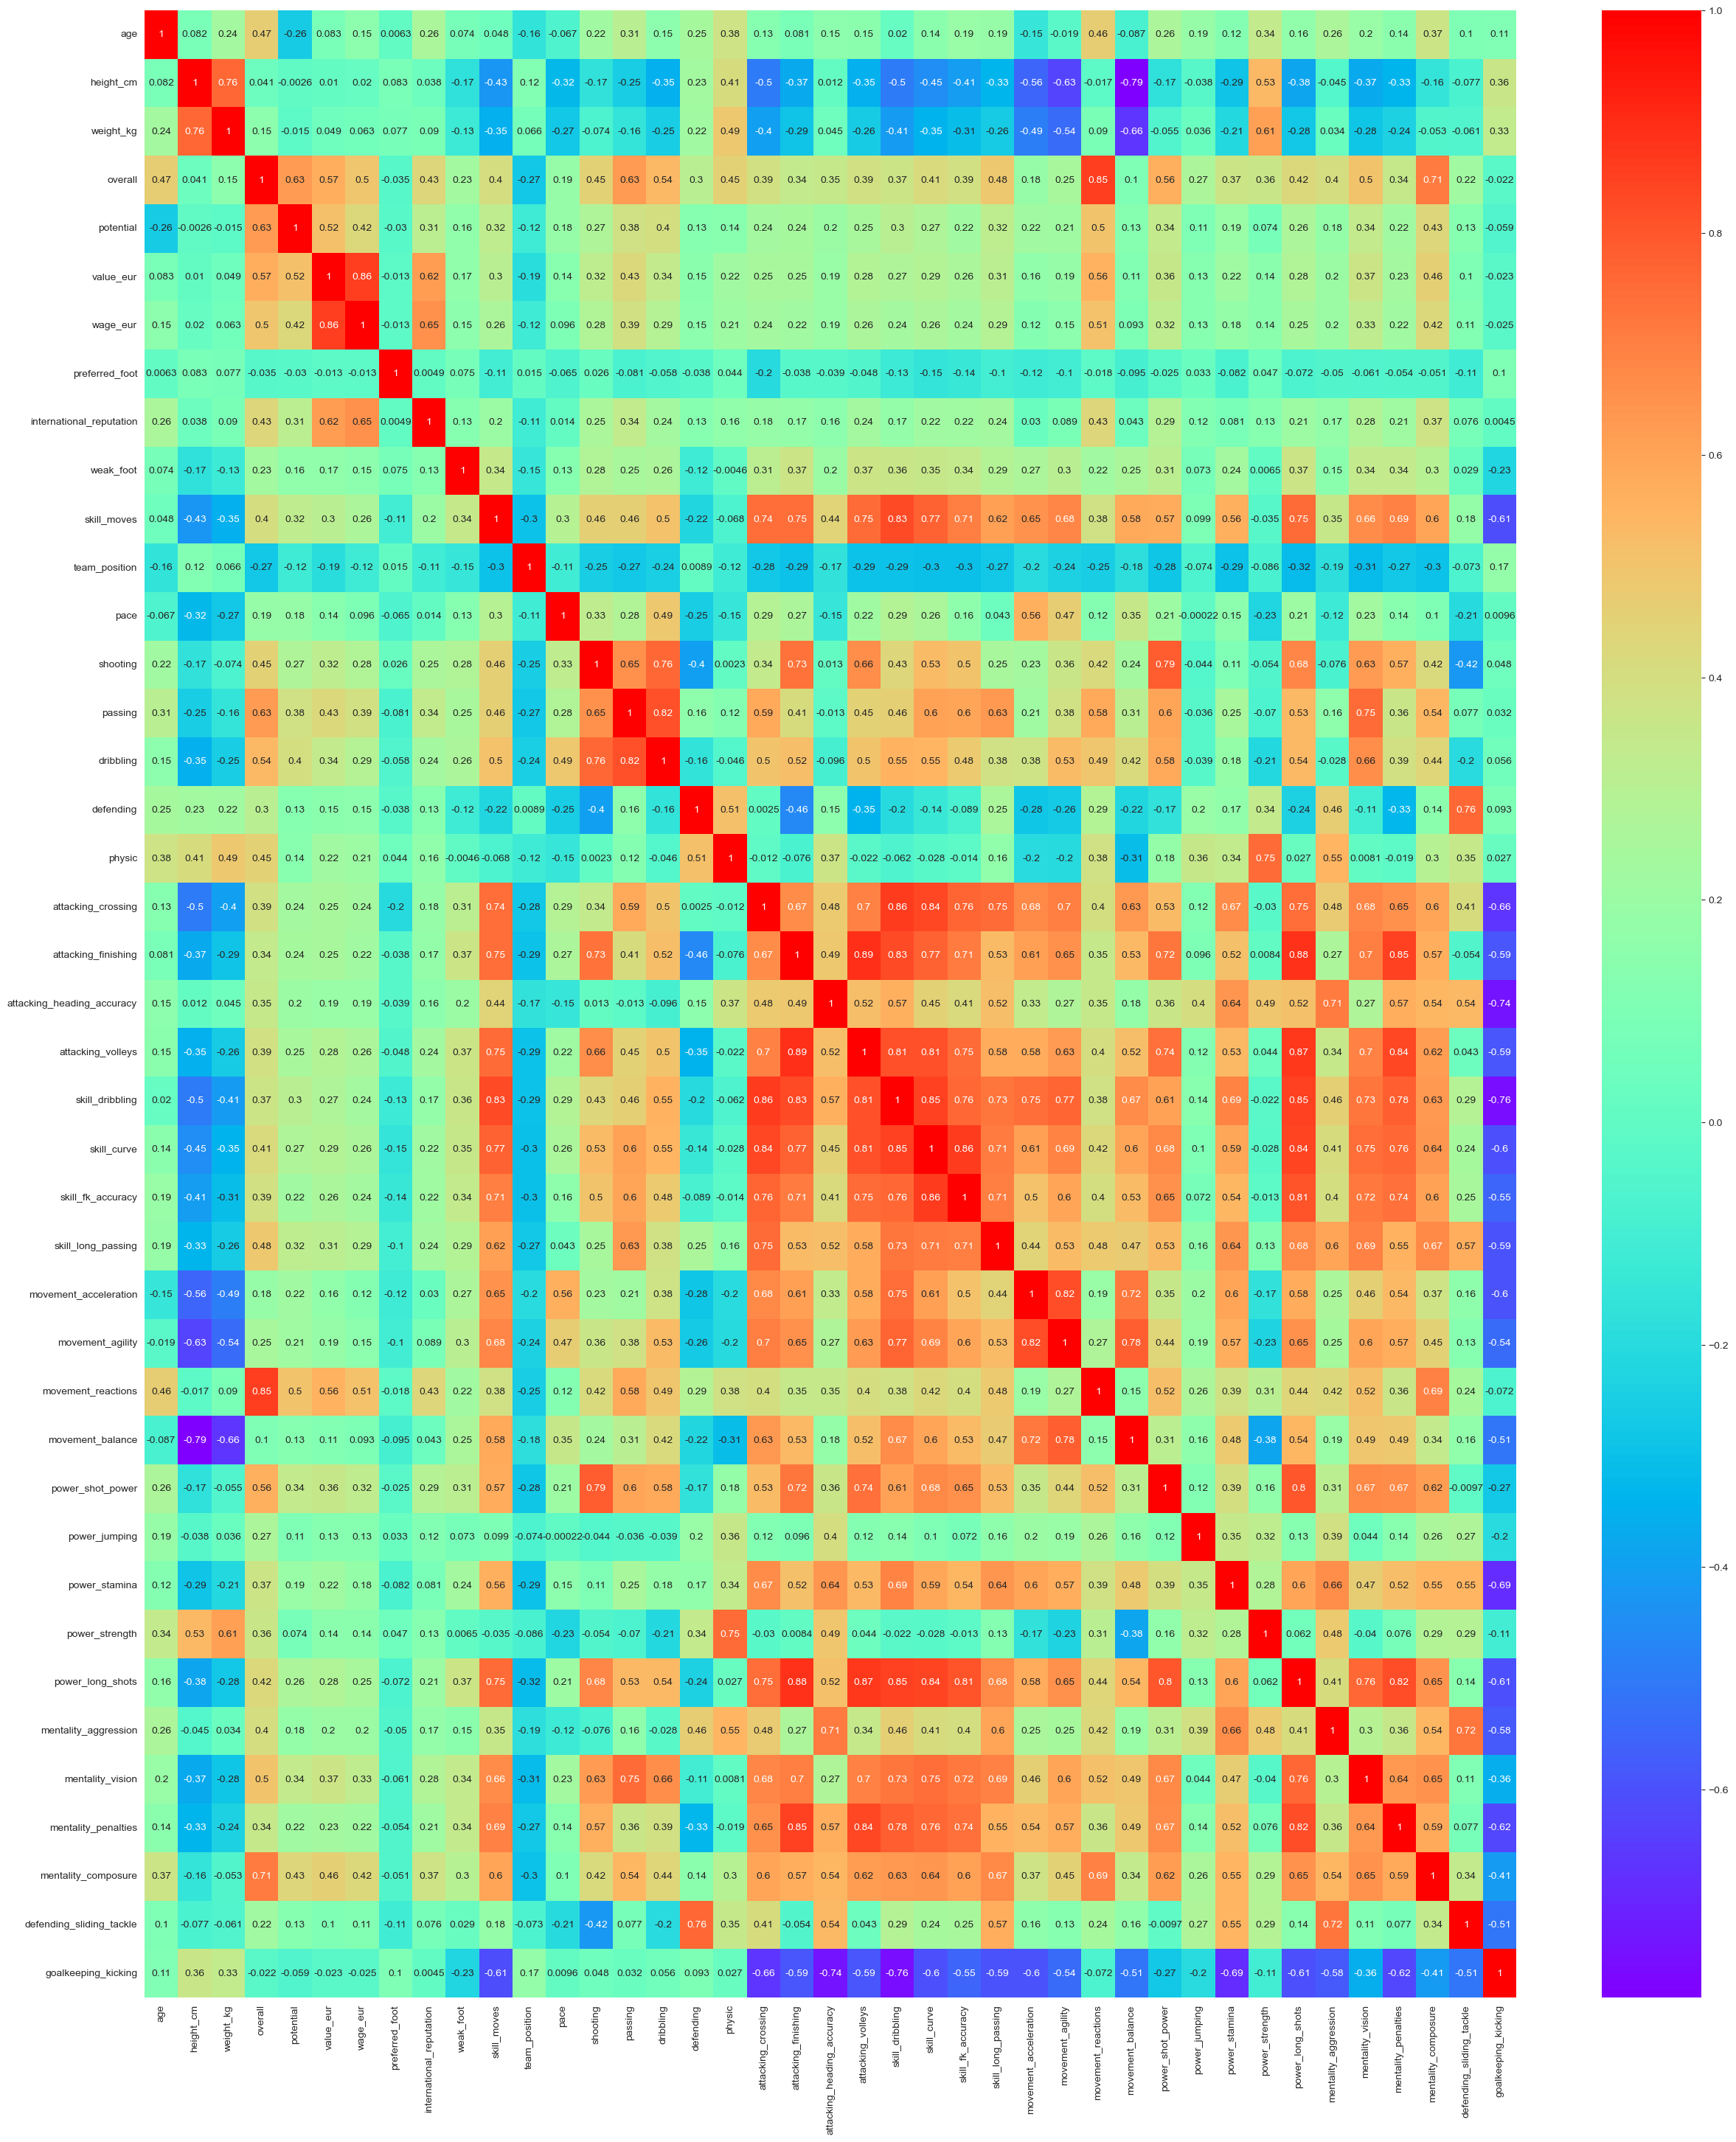

In [128]:
# Plot hitmap for after drop highly correlated feature better visualisation
plt.figure(figsize=(30,35))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.show()

In [129]:
df.duplicated().sum()

0

Model Creation

In [130]:

from sklearn.decomposition import PCA
pca = PCA() 
principlecomponents = pca.fit_transform(df)

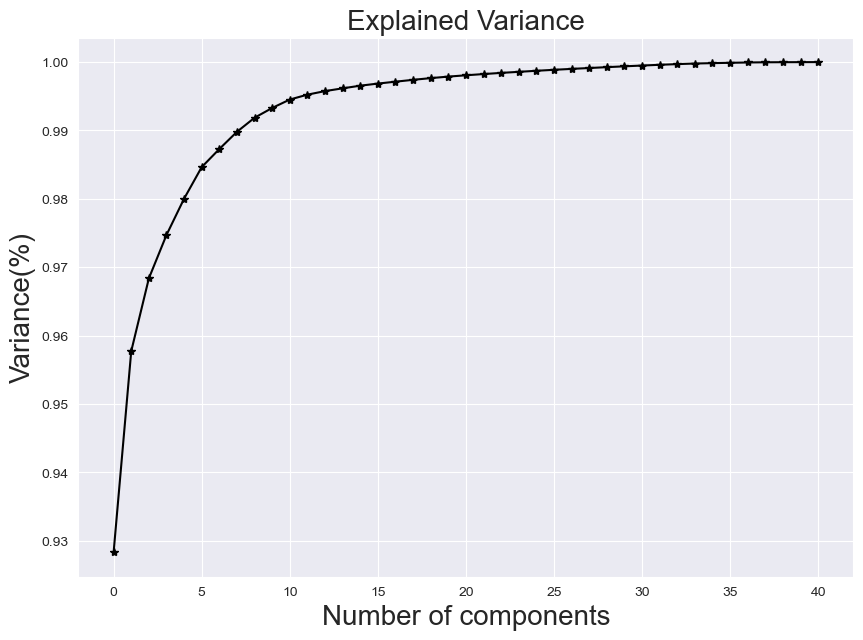

In [131]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') 
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) 
plt.title('Explained Variance',fontsize=20)
plt.show()

In [132]:
pca = PCA(n_components=10)
fifa = pca.fit_transform(df)

In [133]:
principle_df = pd.DataFrame(data=fifa,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.461256  2.015093 -0.120716  1.421170  0.341254  2.739365  1.537911   
1  14.498249  2.574933 -0.087257  1.623457  1.366016  2.168915  1.613286   
2   8.528416  3.407803 -0.926819  1.136359  1.184205  2.325617  1.935466   
3  -1.789442 -1.354069 -0.828835  0.997627  0.682169  1.649939  0.772433   
4  14.445248  1.825999 -0.363463  0.916800  1.017116  1.766324  1.135592   

       pca8      pca9     pca10  
0 -0.620568  1.301942 -0.047105  
1  0.292841  1.265540 -0.274167  
2 -0.107818  1.244893  0.240956  
3 -0.284533  0.193712 -0.255266  
4 -0.397054  1.032398  0.079637

K-MEANS CLUSTERING

In [134]:
X = principle_df
X.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.461256  2.015093 -0.120716  1.421170  0.341254  2.739365  1.537911   
1  14.498249  2.574933 -0.087257  1.623457  1.366016  2.168915  1.613286   
2   8.528416  3.407803 -0.926819  1.136359  1.184205  2.325617  1.935466   
3  -1.789442 -1.354069 -0.828835  0.997627  0.682169  1.649939  0.772433   
4  14.445248  1.825999 -0.363463  0.916800  1.017116  1.766324  1.135592   

       pca8      pca9     pca10  
0 -0.620568  1.301942 -0.047105  
1  0.292841  1.265540 -0.274167  
2 -0.107818  1.244893  0.240956  
3 -0.284533  0.193712 -0.255266  
4 -0.397054  1.032398  0.079637

  File "C:\Users\balag\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\balag\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\balag\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\balag\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


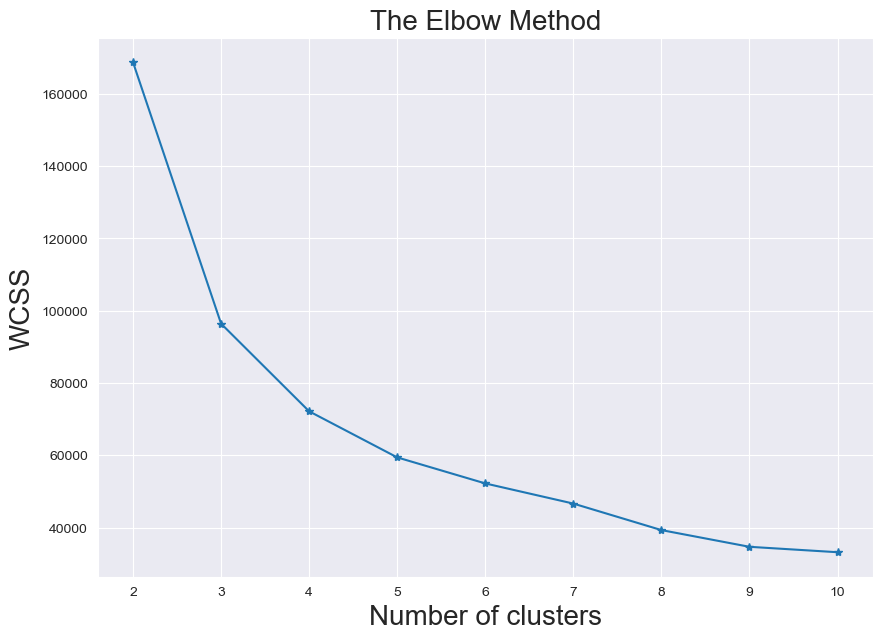

In [135]:
from sklearn.cluster import KMeans
kmeans = KMeans() 
wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(2,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()

In [136]:

kmeans = KMeans(n_clusters=3,random_state=45)
kmeans.fit(X)


KMeans(n_clusters=3, random_state=45)

In [137]:
kmeans.labels_

array([1, 1, 2, ..., 0, 0, 0])

In [138]:
principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.461256  2.015093 -0.120716  1.421170  0.341254  2.739365  1.537911   
1  14.498249  2.574933 -0.087257  1.623457  1.366016  2.168915  1.613286   
2   8.528416  3.407803 -0.926819  1.136359  1.184205  2.325617  1.935466   
3  -1.789442 -1.354069 -0.828835  0.997627  0.682169  1.649939  0.772433   
4  14.445248  1.825999 -0.363463  0.916800  1.017116  1.766324  1.135592   

       pca8      pca9     pca10  cluster  
0 -0.620568  1.301942 -0.047105        1  
1  0.292841  1.265540 -0.274167        1  
2 -0.107818  1.244893  0.240956        2  
3 -0.284533  0.193712 -0.255266        0  
4 -0.397054  1.032398  0.079637        1

In [139]:
kmeans.cluster_centers_

array([[-3.03251217e+00, -6.90993259e-02, -1.11911335e-02,
         4.23092331e-04,  4.01315887e-03,  2.65525211e-03,
         6.82659717e-03,  1.22631989e-02,  8.38568836e-03,
         1.66374887e-03],
       [ 1.41434355e+01, -2.38180882e-01, -3.36534361e-02,
        -3.98807488e-02,  3.41878122e-02,  1.36296231e-02,
        -6.05324378e-03,  3.70820967e-02,  6.26547822e-02,
        -1.09120363e-02],
       [ 4.75473766e+00,  3.36288716e-01,  5.24626545e-02,
         1.47542170e-02, -2.78096126e-02, -1.47433588e-02,
        -2.11909683e-02, -5.75716591e-02, -5.45376189e-02,
        -1.32648398e-03]])

In [140]:
labels = kmeans.labels_
labels

array([1, 1, 2, ..., 0, 0, 0])

In [141]:
from sklearn.metrics import silhouette_score
silhou_score = silhouette_score(X,labels)
print("Silhouette Score:",silhou_score)

Silhouette Score: 0.6324817470618223


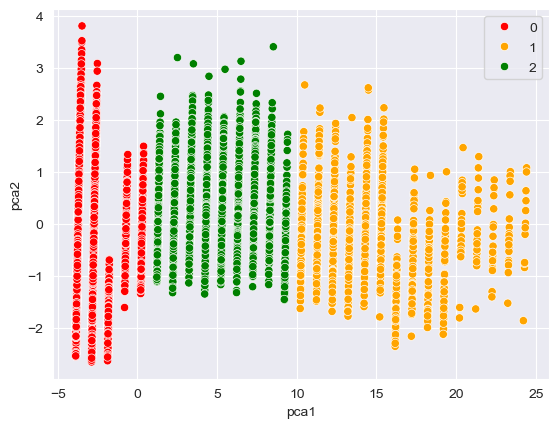

In [142]:
sns.scatterplot(
    x=principle_df['pca1'],
    y=principle_df['pca2'],
    hue=kmeans.labels_,
    palette=['red', 'orange', 'green']
)
plt.show()


In [143]:
import pickle
file = open("kmeans_clustering_model.pkl","wb")
pickle.dump(kmeans,file)